In [ ]:
# import all libraries needed
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
from decimal import Decimal
from math import log
from collections import Counter
import json
import ast
pd.options.mode.chained_assignment = None

In [ ]:
# Importing google drive to get access to files

from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
gd1 = pd.read_csv('/content/drive/MyDrive/Dat490/Data/game_data1.csv')
gd2 = pd.read_csv('/content/drive/MyDrive/Dat490/Data/game_data2.csv')
gd3 = pd.read_csv('/content/drive/MyDrive/Dat490/Data/game_data3.csv')
gd4 = pd.read_csv('/content/drive/MyDrive/Dat490/Data/game_data4.csv')

gd = pd.concat([gd1, gd2, gd3, gd4])

Mounted at /content/drive


<ipython-input-2-9a327017d647>:10: DtypeWarning: Columns (3,18) have mixed types. Specify dtype option on import or set low_memory=False.
  gd4 = pd.read_csv('/content/drive/MyDrive/Dat490/Data/game_data4.csv')


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ssd1 = pd.read_csv('/content/drive/MyDrive/Dat490/Data/steamspy_data_list_1.csv')
ssd2 = pd.read_csv('/content/drive/MyDrive/Dat490/Data/steamspy_data_list_2.csv')
ssd3 = pd.read_csv('/content/drive/MyDrive/Dat490/Data/steamspy_data_list_3.csv')

ssd = pd.concat([ssd1, ssd2, ssd3])

ssd.shape

(73298, 20)

In [ ]:
# get shapes
print(gd.shape)
print(ssd.shape)

(73299, 40)
(73298, 20)


In [ ]:
# check data types
gd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73299 entries, 0 to 16481
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   type                     73198 non-null  object 
 1   name                     73289 non-null  object 
 2   steam_appid              64680 non-null  float64
 3   required_age             73198 non-null  object 
 4   is_free                  73198 non-null  object 
 5   controller_support       16848 non-null  object 
 6   dlc                      11980 non-null  object 
 7   detailed_description     73128 non-null  object 
 8   about_the_game           73126 non-null  object 
 9   short_description        73135 non-null  object 
 10  fullgame                 0 non-null      float64
 11  supported_languages      73113 non-null  object 
 12  header_image             73198 non-null  object 
 13  website                  37186 non-null  object 
 14  pc_requirements          73

In [ ]:
# check data types
ssd.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73298 entries, 0 to 23297
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            73298 non-null  int64  
 1   name             73286 non-null  object 
 2   developer        73020 non-null  object 
 3   publisher        72919 non-null  object 
 4   score_rank       42 non-null     float64
 5   positive         73298 non-null  int64  
 6   negative         73298 non-null  int64  
 7   userscore        73298 non-null  int64  
 8   owners           73298 non-null  object 
 9   average_forever  73298 non-null  int64  
 10  average_2weeks   73298 non-null  int64  
 11  median_forever   73298 non-null  int64  
 12  median_2weeks    73298 non-null  int64  
 13  price            73269 non-null  float64
 14  initialprice     73276 non-null  float64
 15  discount         73276 non-null  float64
 16  languages        73195 non-null  object 
 17  genre            

In [ ]:
# working first on the game data
gd_copy = gd.copy()
gd_copy.isna().sum()

,0
type,101
name,10
steam_appid,8619
required_age,101
is_free,101
controller_support,56451
dlc,61319
detailed_description,171
about_the_game,173
short_description,164


In [ ]:
# drop the unecessary columns
# if na values account for more than 50% of the column, I am dropping it here
dropna_gd = gd_copy[gd_copy.columns.difference(['dlc', 'fullgame', 'legal_notice', 'drm_notice', 'ext_user_account_notice', 'demos', 'metacritic', 'reviews'])]

In [ ]:
# check shape and overall dataset again
game_data = dropna_gd.copy()
print(game_data.shape)
print(game_data.info())

(73299, 32)
<class 'pandas.core.frame.DataFrame'>
Index: 73299 entries, 0 to 16481
Data columns (total 32 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   about_the_game        73126 non-null  object 
 1   achievements          41390 non-null  object 
 2   background            73105 non-null  object 
 3   categories            72408 non-null  object 
 4   content_descriptors   73198 non-null  object 
 5   controller_support    16848 non-null  object 
 6   detailed_description  73128 non-null  object 
 7   developers            73005 non-null  object 
 8   genres                73070 non-null  object 
 9   header_image          73198 non-null  object 
 10  is_free               73198 non-null  object 
 11  linux_requirements    73198 non-null  object 
 12  mac_requirements      73198 non-null  object 
 13  movies                70468 non-null  object 
 14  name                  73289 non-null  object 
 15  package_grou

In [ ]:
# renaming the columns that will be used to join on the steamspy data
game_data.rename(columns = {'steam_appid' :'appid' , 'developers' : 'developer_game' , 'name' : 'name_game' , 'publishers' : 'publisher_game' , 'genres' : 'genre_game'}, inplace = True)

In [ ]:
# working now on the steamspy data
ssd_copy = ssd.copy()
ssd_copy.isna().sum()

,0
appid,0
name,12
developer,278
publisher,379
score_rank,73256
positive,0
negative,0
userscore,0
owners,0
average_forever,0


In [ ]:
# drop the unecessary columns
# if na values account for more than 50% of the column, I am dropping it here >12500
dropna_ssd = ssd_copy[ssd_copy.columns.difference(['score_rank'])]

In [ ]:
# check shape and overall dataset again
steamspy_data = dropna_ssd.copy()
print(steamspy_data.shape)
print(steamspy_data.info())

(73298, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 73298 entries, 0 to 23297
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            73298 non-null  int64  
 1   average_2weeks   73298 non-null  int64  
 2   average_forever  73298 non-null  int64  
 3   ccu              73298 non-null  int64  
 4   developer        73020 non-null  object 
 5   discount         73276 non-null  float64
 6   genre            72977 non-null  object 
 7   initialprice     73276 non-null  float64
 8   languages        73195 non-null  object 
 9   median_2weeks    73298 non-null  int64  
 10  median_forever   73298 non-null  int64  
 11  name             73286 non-null  object 
 12  negative         73298 non-null  int64  
 13  owners           73298 non-null  object 
 14  positive         73298 non-null  int64  
 15  price            73269 non-null  float64
 16  publisher        72919 non-null  object 
 17  tags 

In [ ]:
steamspy_data.head()

,appid,average_2weeks,average_forever,ccu,developer,discount,genre,initialprice,languages,median_2weeks,median_forever,name,negative,owners,positive,price,publisher,tags,userscore
0,10,299,9754,15312,Valve,0.0,Action,999.0,"English, French, German, Italian, Spanish - Sp...",61,268,Counter-Strike,6175,"10,000,000 .. 20,000,000",234532,999.0,Valve,"{'Action': 5477, 'FPS': 4902, 'Multiplayer': 3...",0
1,20,0,399,72,Valve,0.0,Action,499.0,"English, French, German, Italian, Spanish - Sp...",0,20,Team Fortress Classic,1097,"5,000,000 .. 10,000,000",7283,499.0,Valve,"{'Action': 764, 'FPS': 327, 'Multiplayer': 277...",0
2,30,211,9183,95,Valve,0.0,Action,499.0,"English, French, German, Italian, Spanish - Spain",211,19,Day of Defeat,675,"1,000,000 .. 2,000,000",6225,499.0,Valve,"{'FPS': 799, 'World War II': 270, 'Multiplayer...",0
3,40,31,582,2,Valve,0.0,Action,499.0,"English, French, German, Italian, Spanish - Sp...",31,16,Deathmatch Classic,524,"5,000,000 .. 10,000,000",2536,499.0,Valve,"{'Action': 635, 'FPS': 151, 'Classic': 115, 'M...",0
4,50,0,846,128,Gearbox Software,0.0,Action,499.0,"English, French, German, Korean",0,270,Half-Life: Opposing Force,1111,"2,000,000 .. 5,000,000",22069,499.0,Valve,"{'FPS': 920, 'Action': 354, 'Classic': 286, 'S...",0


In [ ]:
result = pd.merge(steamspy_data, game_data, how="inner", on=['appid'])
print(result.shape)
result.info()

(64675, 50)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64675 entries, 0 to 64674
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   appid                 64675 non-null  int64  
 1   average_2weeks        64675 non-null  int64  
 2   average_forever       64675 non-null  int64  
 3   ccu                   64675 non-null  int64  
 4   developer             64488 non-null  object 
 5   discount              64674 non-null  float64
 6   genre                 64447 non-null  object 
 7   initialprice          64674 non-null  float64
 8   languages             64653 non-null  object 
 9   median_2weeks         64675 non-null  int64  
 10  median_forever        64675 non-null  int64  
 11  name                  64665 non-null  object 
 12  negative              64675 non-null  int64  
 13  owners                64675 non-null  object 
 14  positive              64675 non-null  int64  
 15  price  

In [ ]:
# see which repeated columns we want to keep
check = result[['publisher', 'publisher_game', 'name', 'name_game', 'developer', 'developer_game', 'genre', 'genre_game']]
print(check.info())
check.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64675 entries, 0 to 64674
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   publisher       64405 non-null  object
 1   publisher_game  64115 non-null  object
 2   name            64665 non-null  object
 3   name_game       64667 non-null  object
 4   developer       64488 non-null  object
 5   developer_game  64493 non-null  object
 6   genre           64447 non-null  object
 7   genre_game      64553 non-null  object
dtypes: object(8)
memory usage: 3.9+ MB
None


,publisher,publisher_game,name,name_game,developer,developer_game,genre,genre_game
0,Valve,['Valve'],Counter-Strike,Counter-Strike,Valve,['Valve'],Action,"[{'id': '1', 'description': 'Action'}]"
1,Valve,['Valve'],Team Fortress Classic,Team Fortress Classic,Valve,['Valve'],Action,"[{'id': '1', 'description': 'Action'}]"
2,Valve,['Valve'],Day of Defeat,Day of Defeat,Valve,['Valve'],Action,"[{'id': '1', 'description': 'Action'}]"
3,Valve,['Valve'],Deathmatch Classic,Deathmatch Classic,Valve,['Valve'],Action,"[{'id': '1', 'description': 'Action'}]"
4,Valve,['Valve'],Half-Life: Opposing Force,Half-Life: Opposing Force,Gearbox Software,['Gearbox Software'],Action,"[{'id': '1', 'description': 'Action'}]"


In [ ]:
d1 = result[['appid', 'average_2weeks', 'average_forever', 'ccu', 'developer']] # cut developer
d2 = result[['discount', 'genre', 'initialprice', 'languages', 'median_2weeks']] # cut nothing
d3 = result[['median_forever', 'name', 'negative', 'owners', 'positive']] # cut nothing
d4 = result[['price', 'publisher', 'tags', 'userscore', 'about_the_game']] # cut userscore, publisher and about the game, userscore is vastly majority zeros
d5 = result[['achievements', 'background', 'categories', 'content_descriptors', 'detailed_description']] # cut acheievements, background, detailed desc
d6 = result[['developer_game', 'genre_game', 'header_image', 'is_free', 'linux_requirements']] # cut all but is_free
d7 = result[['mac_requirements', 'movies', 'name_game', 'package_groups', 'packages']]  # cut all
d8 = result[['pc_requirements', 'platforms', 'price_overview', 'publisher_game', 'release_date']] # cut all but release date
d9 = result[['required_age', 'screenshots', 'short_description', 'support_info', 'supported_languages', 'type', 'website']] # cut all but required age

In [ ]:
# can stay: controller support, website, platforms
# categories looks to be features, multiplayer/familysharing/anticheat
# reccomendations/achievements -> pull the number out
# cut + reason:
# dlc/demos/packages -> lack of time to sort through what the numbers mean, and if it should be a count of dlc
# platform requirements -> unsure what is wanted + theyre a mess to look at
# price overview -> we get similar information on the price, initial price, and discount columns
# score rank is pretty much empty

In [ ]:
df = result[['appid', 'name', 'genre', 'price', 'discount', 'initialprice', 'required_age', 'median_2weeks', 'median_forever', 'average_2weeks', 'average_forever', 'ccu',
              'positive', 'negative', 'languages', 'owners', 'tags', 'categories', 'is_free', 'release_date', 'controller_support', 'website', 'platforms', 'recommendations', 'achievements']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64675 entries, 0 to 64674
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   appid               64675 non-null  int64  
 1   name                64665 non-null  object 
 2   genre               64447 non-null  object 
 3   price               64674 non-null  float64
 4   discount            64674 non-null  float64
 5   initialprice        64674 non-null  float64
 6   required_age        64675 non-null  object 
 7   median_2weeks       64675 non-null  int64  
 8   median_forever      64675 non-null  int64  
 9   average_2weeks      64675 non-null  int64  
 10  average_forever     64675 non-null  int64  
 11  ccu                 64675 non-null  int64  
 12  positive            64675 non-null  int64  
 13  negative            64675 non-null  int64  
 14  languages           64653 non-null  object 
 15  owners              64675 non-null  object 
 16  tags

In [ ]:
df['languages'] = df.languages.fillna("")
df['languages'] = df.languages.str.split(',').str.len() # run the cell previous, then run this cell again if this fails
df['price'] = df.price.apply(lambda x: x/100)
df['initialprice'] = df.initialprice.apply(lambda x: x/100)
df['required_age'] = df.required_age.fillna("0")
df.loc[ df['required_age'] == '17+', 'required_age'] = '17'
df['required_age'] = df['required_age'].astype('int64')
df['recommendations'] = df.recommendations.fillna("0")
df['recommendations'] = df.recommendations.str.extract(r'(\d+[.\d]*)')
df['achievements'] = df.achievements.fillna("0")
df['achievements'] = df.achievements.str.extract(r'(\d+[.\d]*)')
df['controller_support'] = (df.controller_support.notnull()).astype('int')
df['website'] = (df.website.notnull()).astype('int')
df['is_free'] = df.is_free.fillna("0")
df['is_free'] = df.is_free.astype('int')

In [ ]:
# TODO
# separate platforms and make binary
# genre
# tags
# categories

In [ ]:
print(df.shape)
print(df.info())

(64675, 25)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64675 entries, 0 to 64674
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   appid               64675 non-null  int64  
 1   name                64665 non-null  object 
 2   genre               64447 non-null  object 
 3   price               64674 non-null  float64
 4   discount            64674 non-null  float64
 5   initialprice        64674 non-null  float64
 6   required_age        64675 non-null  int64  
 7   median_2weeks       64675 non-null  int64  
 8   median_forever      64675 non-null  int64  
 9   average_2weeks      64675 non-null  int64  
 10  average_forever     64675 non-null  int64  
 11  ccu                 64675 non-null  int64  
 12  positive            64675 non-null  int64  
 13  negative            64675 non-null  int64  
 14  languages           64675 non-null  int64  
 15  owners              64675 non-null  objec

In [ ]:
#df.to_csv('/content/drive/MyDrive/Dat490/Data/combined_df_cleaned.csv', index=False)
df_cleaned = pd.read_csv('/content/drive/MyDrive/Dat490/Data/combined_df_cleaned.csv')
df_cleaned.head()

,appid,name,genre,price,discount,initialprice,required_age,median_2weeks,median_forever,average_2weeks,...,owners,tags,categories,is_free,release_date,controller_support,website,platforms,recommendations,achievements
0,10,Counter-Strike,Action,9.99,0.0,9.99,0,61,268,299,...,"10,000,000 .. 20,000,000","{'Action': 5477, 'FPS': 4902, 'Multiplayer': 3...","[{'id': 1, 'description': 'Multi-player'}, {'i...",0,"Nov 1, 2000",0,0,"{'windows': True, 'mac': True, 'linux': True}",152593,0
1,20,Team Fortress Classic,Action,4.99,0.0,4.99,0,0,20,0,...,"5,000,000 .. 10,000,000","{'Action': 764, 'FPS': 327, 'Multiplayer': 277...","[{'id': 1, 'description': 'Multi-player'}, {'i...",0,"Apr 1, 1999",0,0,"{'windows': True, 'mac': True, 'linux': True}",6250,0
2,30,Day of Defeat,Action,4.99,0.0,4.99,0,211,19,211,...,"1,000,000 .. 2,000,000","{'FPS': 799, 'World War II': 270, 'Multiplayer...","[{'id': 1, 'description': 'Multi-player'}, {'i...",0,"May 1, 2003",0,1,"{'windows': True, 'mac': True, 'linux': True}",4134,0
3,40,Deathmatch Classic,Action,4.99,0.0,4.99,0,31,16,31,...,"5,000,000 .. 10,000,000","{'Action': 635, 'FPS': 151, 'Classic': 115, 'M...","[{'id': 1, 'description': 'Multi-player'}, {'i...",0,"Jun 1, 2001",0,0,"{'windows': True, 'mac': True, 'linux': True}",2212,0
4,50,Half-Life: Opposing Force,Action,4.99,0.0,4.99,0,0,270,0,...,"2,000,000 .. 5,000,000","{'FPS': 920, 'Action': 354, 'Classic': 286, 'S...","[{'id': 2, 'description': 'Single-player'}, {'...",0,"Nov 1, 1999",0,0,"{'windows': True, 'mac': True, 'linux': True}",19968,0


In [ ]:
#converting release_date to days_released:
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], format='%b %d, %Y', errors='coerce')
# The errors='coerce' argument tells the function to replace invalid values with NaT (Not a Time)
today = pd.to_datetime('today')
df_cleaned['days_released'] = (today - df_cleaned['release_date']).dt.days

# Function to extract the upper limit (max value) from the owner range
def get_max_owners(owner_range):
    # Remove commas and split by '..'
    range_parts = owner_range.replace(',', '').split('..')
    # Take the upper limit, strip any extra spaces, and convert to an integer
    return int(range_parts[1].strip())

# Apply the function to the 'owners' column to create a new column with the max values
df_cleaned['max_owners'] = df_cleaned['owners'].apply(get_max_owners)
df_cleaned.head()
df_cleaned.drop(columns=['owners'], inplace=True)

# if owners = 20k replace with 10k:
df_cleaned['max_owners'] = df_cleaned['max_owners'].replace(20000, 10000)

In [ ]:
# all games where days_released is less than 1:
df_cleaned[df_cleaned['days_released'] < 10]
#dropping games with less than 1 days_released:
df_cleaned = df_cleaned[df_cleaned['days_released'] > 1]

In [ ]:
pd.set_option('display.max_columns', 26)

reg_df = df_cleaned.copy()
reg_df = reg_df.drop(columns=[ 'languages', 'required_age', 'categories', 'is_free', 'release_date', 'controller_support', 'website', 'platforms', 'price', 'discount', 'average_2weeks', 'average_forever', 'achievements'])
reg_df.head()

#move tags so it's 4th column:
tags = reg_df.pop('tags')
reg_df.insert(3, 'tags', tags)


#creating positive / days_released as PosPerDay:
reg_df['PosPerDay'] = reg_df['positive'] / reg_df['days_released']
reg_df['NegPerDay'] = reg_df['negative'] / reg_df['days_released']
reg_df['RecsPerDay'] = reg_df['recommendations'] / reg_df['days_released']
reg_df['MaxOwnersPerDay'] = reg_df['max_owners'] / reg_df['days_released']
reg_df.head()

print(reg_df.drop(columns=['appid', 'name', 'genre', 'tags']).nunique())
reg_df.isna().sum()

print(reg_df.drop(columns=['appid', 'name', 'genre', 'tags']).nunique())
print(reg_df.info())

#how many nulls?
reg_df.isna().sum()

print((reg_df == 0).sum())

initialprice         300
median_2weeks        363
median_forever      1663
ccu                 1160
positive            5037
negative            2516
recommendations     4511
days_released       4613
max_owners            14
PosPerDay          41954
NegPerDay          31769
RecsPerDay         14447
MaxOwnersPerDay    11799
dtype: int64
initialprice         300
median_2weeks        363
median_forever      1663
ccu                 1160
positive            5037
negative            2516
recommendations     4511
days_released       4613
max_owners            14
PosPerDay          41954
NegPerDay          31769
RecsPerDay         14447
MaxOwnersPerDay    11799
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 64369 entries, 0 to 64674
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   appid            64369 non-null  int64  
 1   name             64359 non-null  object 
 2   genre            64157 non-null

In [ ]:
df3 = df_cleaned[['appid', 'name', 'positive', 'negative']]

df_cleaned['percent_positive'] = df3.apply(lambda x: x['positive'] if (x['negative'] + x['positive']) < 1
                                    else x['positive']/(x['negative'] + x['positive']), axis=1)
df_cleaned.head()

,appid,name,genre,price,discount,initialprice,required_age,median_2weeks,median_forever,average_2weeks,average_forever,ccu,positive,...,languages,tags,categories,is_free,release_date,controller_support,website,platforms,recommendations,achievements,days_released,max_owners,percent_positive
0,10,Counter-Strike,Action,9.99,0.0,9.99,0,61,268,299,9754,15312,234532,...,8,"{'Action': 5477, 'FPS': 4902, 'Multiplayer': 3...","[{'id': 1, 'description': 'Multi-player'}, {'i...",0,2000-11-01,0,0,"{'windows': True, 'mac': True, 'linux': True}",152593,0,8734.0,20000000,0.974346
1,20,Team Fortress Classic,Action,4.99,0.0,4.99,0,0,20,0,399,72,7283,...,9,"{'Action': 764, 'FPS': 327, 'Multiplayer': 277...","[{'id': 1, 'description': 'Multi-player'}, {'i...",0,1999-04-01,0,0,"{'windows': True, 'mac': True, 'linux': True}",6250,0,9314.0,10000000,0.869093
2,30,Day of Defeat,Action,4.99,0.0,4.99,0,211,19,211,9183,95,6225,...,5,"{'FPS': 799, 'World War II': 270, 'Multiplayer...","[{'id': 1, 'description': 'Multi-player'}, {'i...",0,2003-05-01,0,1,"{'windows': True, 'mac': True, 'linux': True}",4134,0,7823.0,2000000,0.902174
3,40,Deathmatch Classic,Action,4.99,0.0,4.99,0,31,16,31,582,2,2536,...,9,"{'Action': 635, 'FPS': 151, 'Classic': 115, 'M...","[{'id': 1, 'description': 'Multi-player'}, {'i...",0,2001-06-01,0,0,"{'windows': True, 'mac': True, 'linux': True}",2212,0,8522.0,10000000,0.828758
4,50,Half-Life: Opposing Force,Action,4.99,0.0,4.99,0,0,270,0,846,128,22069,...,4,"{'FPS': 920, 'Action': 354, 'Classic': 286, 'S...","[{'id': 2, 'description': 'Single-player'}, {'...",0,1999-11-01,0,0,"{'windows': True, 'mac': True, 'linux': True}",19968,0,9100.0,5000000,0.952071


Text(0.5, 1.0, 'Chart of the Percentage of Positive Reviews for Games')

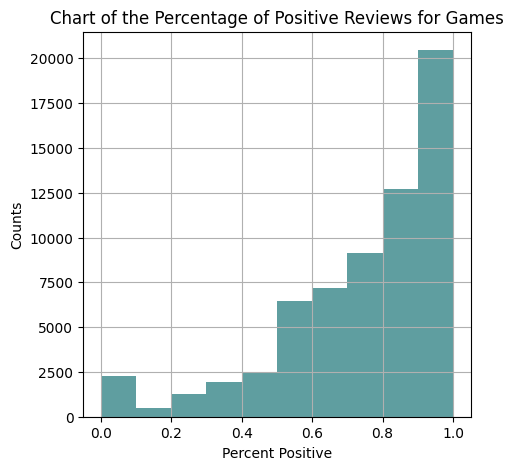

In [ ]:
fig, ax1 = plt.subplots(figsize = (5, 5))

df_cleaned['percent_positive'].hist(color = 'cadetblue')
ax1.set_xlabel('Percent Positive', fontsize = 10)
ax1.set_ylabel('Counts', fontsize = 10)
ax1.set_title('Chart of the Percentage of Positive Reviews for Games')

<Axes: >

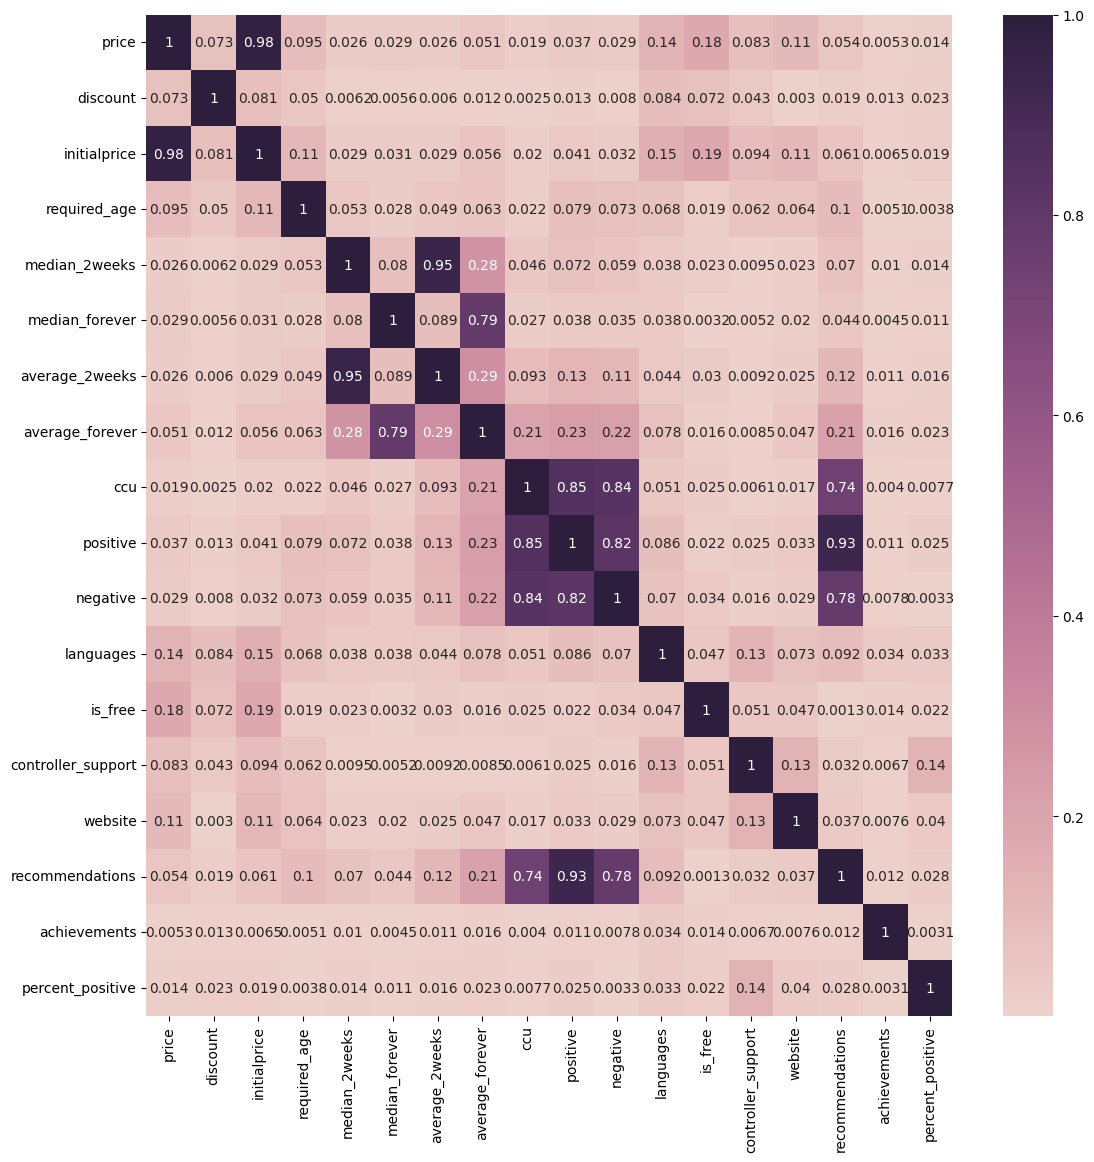

In [ ]:
df1 = df_cleaned[['price', 'discount', 'initialprice', 'required_age', 'median_2weeks', 'median_forever', 'average_2weeks', 'average_forever', 'ccu',
              'positive', 'negative', 'languages', 'is_free', 'controller_support', 'website', 'recommendations', 'achievements', 'percent_positive']]
fig, ax1 = plt.subplots(figsize=(13, 13))
sns.heatmap(np.abs(df1.corr()), annot=True, ax=ax1, cmap = sns.cubehelix_palette(as_cmap = True))

Looking over the heat map, all the high correlations make sense and seem like things we expected to see have correlations

In [ ]:
df2 = df_cleaned['genre']
df2 = df2.fillna("none")
tot_genres = []

for i in range(0, len(df2)):
  genres = df2.iloc[i].split(', ')

  for j in range(0, len(genres)):
    tot_genres.append(genres[j])

genre_count = Counter(tot_genres)
genre_count

# converting genre_count to df:
genre_df = pd.DataFrame.from_dict(genre_count, orient = 'index').reset_index()
genre_df = genre_df.rename(columns = {'index':'genre', 0:'count'})

# saving df as csv:
genre_df.to_csv('/content/drive/MyDrive/Dat490/Data/genre_count.csv', index = False)

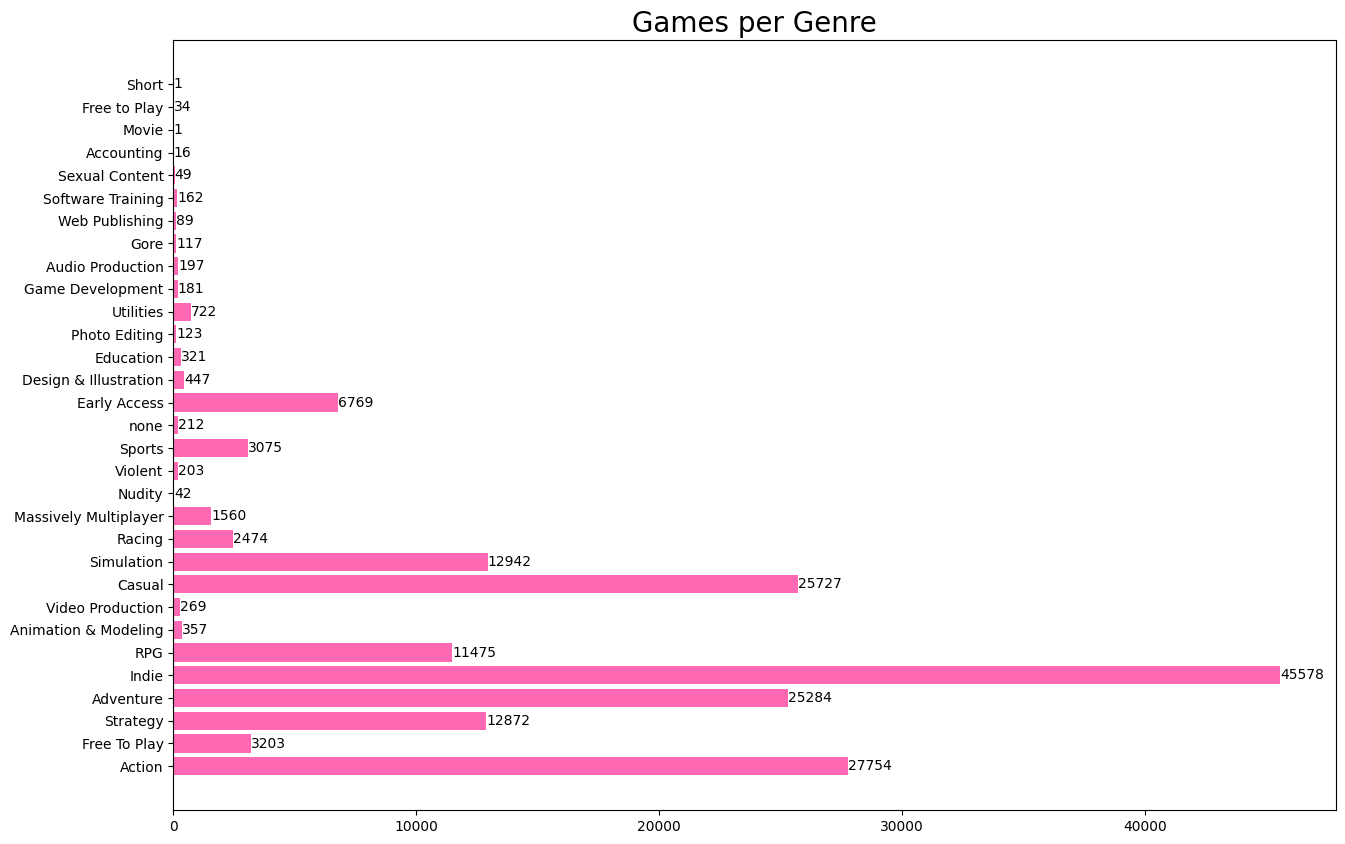

In [ ]:
fig, ax = plt.subplots(figsize =(15, 10))

plt.barh(range(len(genre_count)), list(genre_count.values()), color = "hotpink")
plt.yticks(range(len(genre_count)), list(genre_count.keys()))
ax.set_title('Games per Genre', fontsize = 20)
ax.bar_label(ax.containers[-1])
plt.show()

In [ ]:
df4 = df_cleaned['tags']
df4 = df4.fillna("none")
tot_tags = []

for i in range(0, len(df4)):
  res = ast.literal_eval(str(df4.iloc[i])) # returns lists if nans
  if isinstance(res, dict): # ignores nans
    tag_keys = res.keys()
    tags = list(tag_keys)

    for j in range(0, len(tags)):
      tot_tags.append(tags[j])


In [ ]:
tag_count = Counter(tot_tags)

print(len(tag_count))

tag_df = pd.DataFrame.from_dict(tag_count, orient='index').reset_index()
tag_df = tag_df.rename(columns={'index':'tag', 0:'count'})
tag_df = tag_df.sort_values('count')
tags_split = np.array_split(tag_df, 10)
tags_split0 = tags_split[0]
tags_split1 = tags_split[1]
tags_split2 = tags_split[2]
tags_split3 = tags_split[3]
tags_split4 = tags_split[4]
tags_split5 = tags_split[5]
tags_split6 = tags_split[6]
tags_split7 = tags_split[7]
tags_split8 = tags_split[8]
tags_split9 = tags_split[9]

# save tag count:
tag_df.to_csv('/content/drive/MyDrive/Dat490/Data/tag_count.csv', index=False)

450


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
genre_df = pd.DataFrame.from_dict(genre_count, orient = 'index').reset_index()
genre_df = genre_df.rename(columns = {'index':'genre', 0:'count'})
genre_df = genre_df.sort_values('count')

genre_df.head()
genre_df.loc[32] = ['Free To Play', 3237]

In [ ]:
genre_df = genre_df.sort_values('count')
genre_df = genre_df.drop([1, 29])
genre_df

,genre,count
30,Short,1
28,Movie,1
27,Accounting,16
12,Nudity,42
26,Sexual Content,49
24,Web Publishing,89
23,Gore,117
19,Photo Editing,123
25,Software Training,162
21,Game Development,181


<ipython-input-27-0c99f487e733>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  reg_df.hist(ax = ax1, bins = 25, color = 'indigo')


array([[<Axes: title={'center': 'appid'}>,
        <Axes: title={'center': 'initialprice'}>,
        <Axes: title={'center': 'median_2weeks'}>,
        <Axes: title={'center': 'median_forever'}>],
       [<Axes: title={'center': 'ccu'}>,
        <Axes: title={'center': 'positive'}>,
        <Axes: title={'center': 'negative'}>,
        <Axes: title={'center': 'recommendations'}>],
       [<Axes: title={'center': 'days_released'}>,
        <Axes: title={'center': 'max_owners'}>,
        <Axes: title={'center': 'PosPerDay'}>,
        <Axes: title={'center': 'NegPerDay'}>],
       [<Axes: title={'center': 'RecsPerDay'}>,
        <Axes: title={'center': 'MaxOwnersPerDay'}>, <Axes: >, <Axes: >]],
      dtype=object)

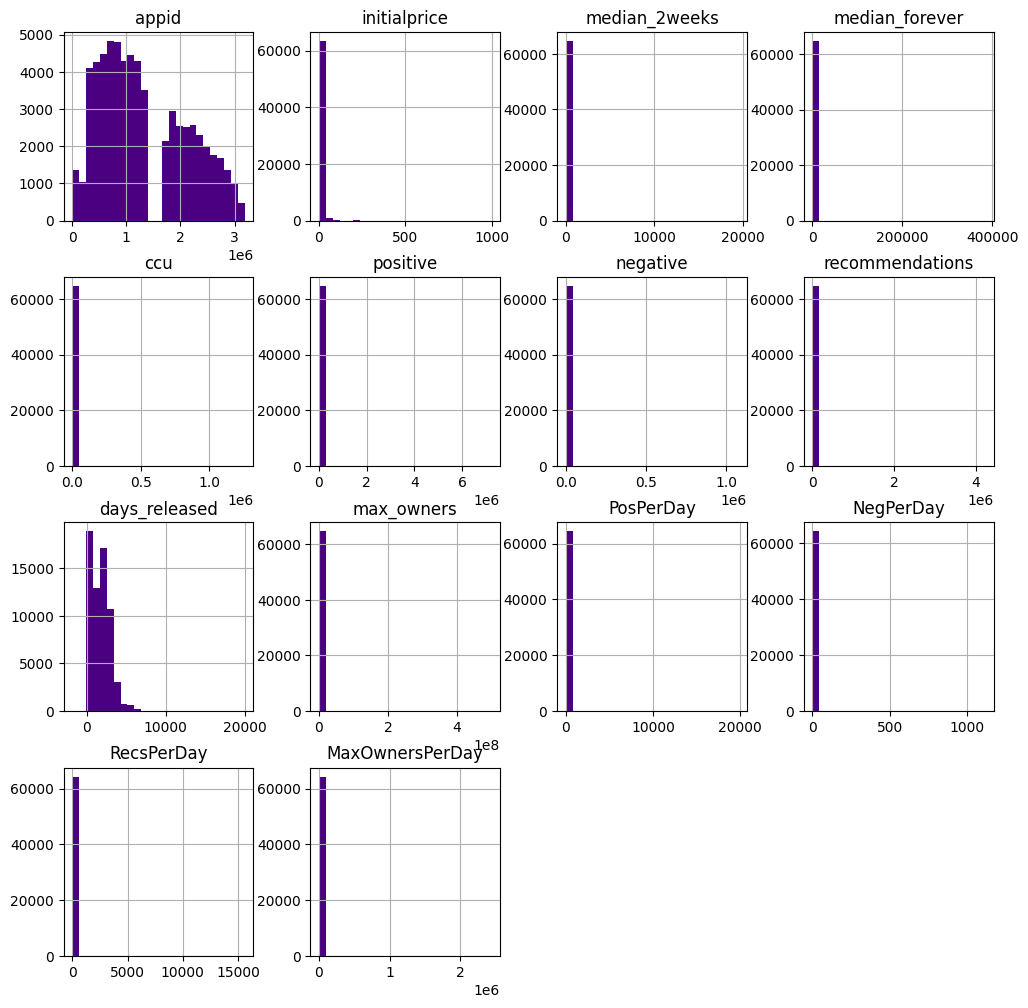

In [ ]:
fig, ax1 = plt.subplots(figsize = (12, 12))

reg_df.hist(ax = ax1, bins = 25, color = 'indigo')

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Drop 'appid', 'name', 'genre', 'tags' as they shouldn't be scaled
features_to_scale = reg_df.drop(columns=['appid', 'name', 'genre', 'tags'])

# Log transform all relevant columns (including 'max_owners')
columns_to_log_transform = [
    'MaxOwnersPerDay', 'initialprice', 'median_2weeks', 'median_forever',
    'ccu', 'PosPerDay', 'NegPerDay', 'RecsPerDay'
]

# Apply log1p transformation to avoid log(0)
for col in columns_to_log_transform:
    features_to_scale[f'log_{col}'] = np.log1p(features_to_scale[col])

# Remove the original columns that were log-transformed
features_to_scale = features_to_scale.drop(columns=columns_to_log_transform)

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the remaining features
scaled_features = scaler.fit_transform(features_to_scale)

# Convert the scaled features back into a DataFrame
df_scaled_feat = pd.DataFrame(scaled_features, columns=features_to_scale.columns)

# Concatenate 'appid', 'name', 'genre', and 'tags' with the scaled features
success_df_final = pd.concat([reg_df[['appid', 'name', 'genre', 'tags']], df_scaled_feat], axis=1)

# Output the final DataFrame
print(success_df_final.info())
print(success_df_final.head())

<class 'pandas.core.frame.DataFrame'>
Index: 64675 entries, 0 to 51432
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   appid                64369 non-null  float64
 1   name                 64359 non-null  object 
 2   genre                64157 non-null  object 
 3   tags                 64369 non-null  object 
 4   positive             64369 non-null  float64
 5   negative             64369 non-null  float64
 6   recommendations      64369 non-null  float64
 7   days_released        64369 non-null  float64
 8   max_owners           64369 non-null  float64
 9   log_MaxOwnersPerDay  64369 non-null  float64
 10  log_initialprice     64369 non-null  float64
 11  log_median_2weeks    64369 non-null  float64
 12  log_median_forever   64369 non-null  float64
 13  log_ccu              64369 non-null  float64
 14  log_PosPerDay        64369 non-null  float64
 15  log_NegPerDay        64369 non-null  floa

<ipython-input-42-f73b194a2b17>:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  success_df_final.hist(ax = ax1, bins = 25, color = 'slateblue')


array([[<Axes: title={'center': 'appid'}>,
        <Axes: title={'center': 'positive'}>,
        <Axes: title={'center': 'negative'}>,
        <Axes: title={'center': 'recommendations'}>],
       [<Axes: title={'center': 'days_released'}>,
        <Axes: title={'center': 'max_owners'}>,
        <Axes: title={'center': 'log_MaxOwnersPerDay'}>,
        <Axes: title={'center': 'log_initialprice'}>],
       [<Axes: title={'center': 'log_median_2weeks'}>,
        <Axes: title={'center': 'log_median_forever'}>,
        <Axes: title={'center': 'log_ccu'}>,
        <Axes: title={'center': 'log_PosPerDay'}>],
       [<Axes: title={'center': 'log_NegPerDay'}>,
        <Axes: title={'center': 'log_RecsPerDay'}>, <Axes: >, <Axes: >]],
      dtype=object)

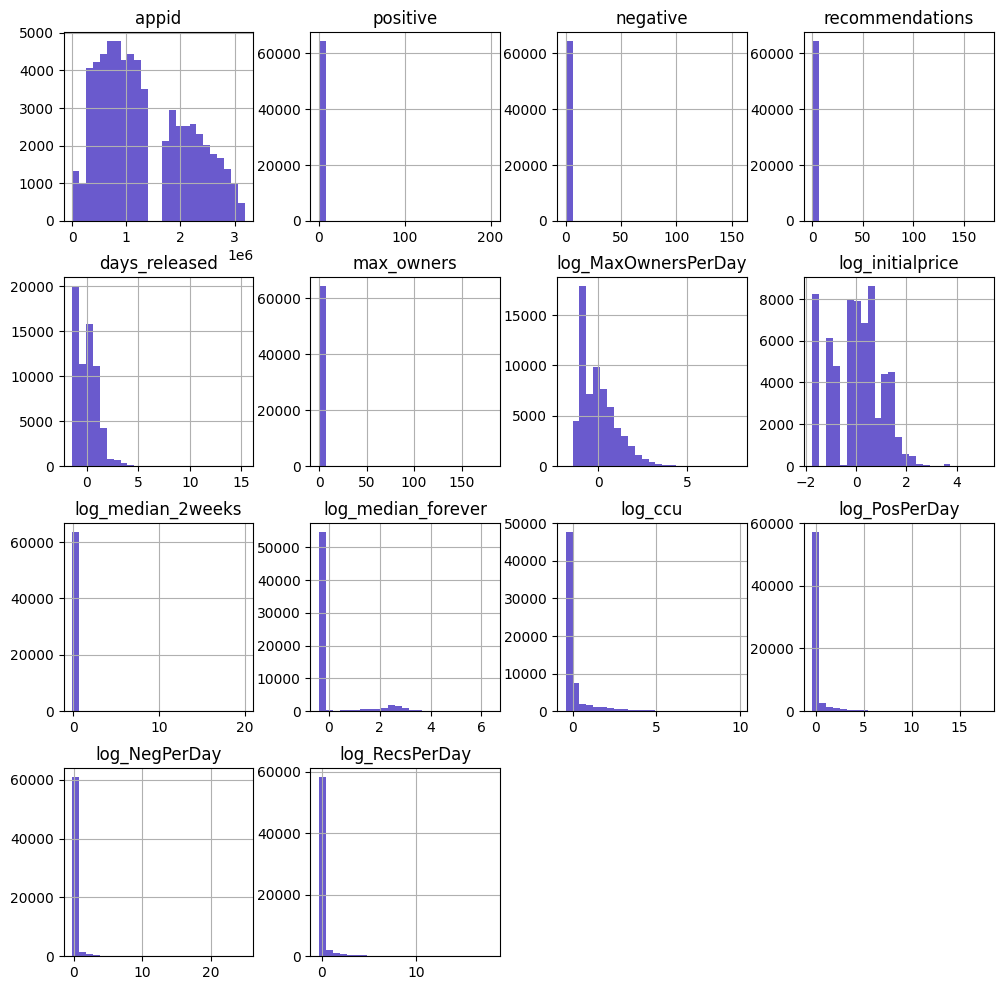

In [ ]:
fig, ax1 = plt.subplots(figsize = (12, 12))

success_df_final.hist(ax = ax1, bins = 25, color = 'slateblue')

In [ ]:
multiple = 0
single = 0
nans = 0

for i in range(0, len(success_df_final)):

  num = success_df_final.loc[i, 'genre']

  if type(num) == float:
    nans = nans + 1
  elif num.find(',') != -1:
    multiple = multiple + 1
  else:
    single = single + 1


Text(0, 0.5, 'Counts')

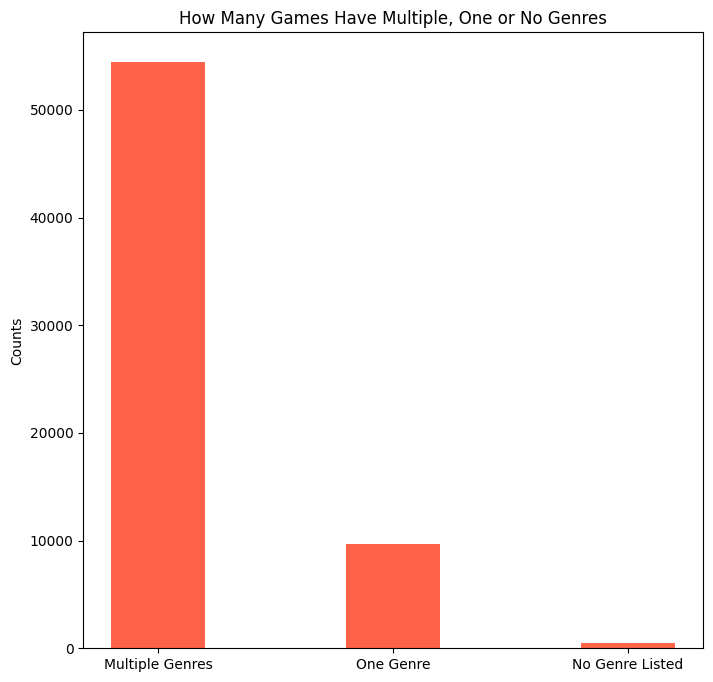

In [ ]:
counts = [multiple, single, nans]

values = ["Multiple Genres", 'One Genre', 'No Genre Listed']

fig, ax1 = plt.subplots(figsize = (8, 8))

ax1.bar(values, counts, width = 0.4, color = 'tomato')
plt.title('How Many Games Have Multiple, One or No Genres')
plt.ylabel('Counts')

In [ ]:
indie = 0
non = 0

for i in range(0, len(success_df_final)):

  num = success_df_final.loc[i, 'genre']

  if type(num) == float:
    num = num
  elif num.find('Indie') != -1:
    indie = indie + 1
  else:
    non = non + 1

print(indie)
print(non)

45578
18579


Text(0, 0.5, 'Count')

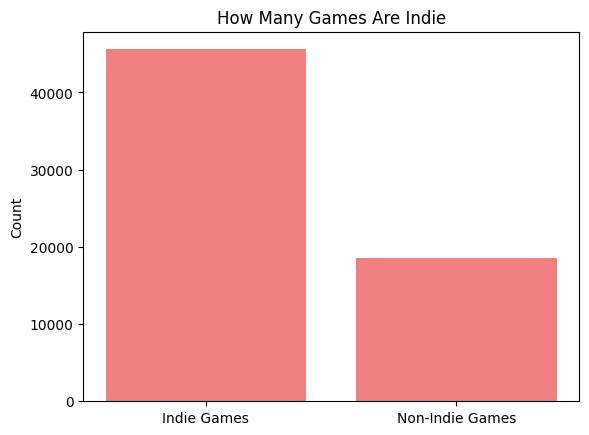

In [ ]:
counts = [indie, non]

values = ['Indie Games', 'Non-Indie Games']

plt.bar(values, counts, color = 'lightcoral')

plt.title('How Many Games Are Indie')

plt.ylabel('Count')

Text(0.5, 1.0, 'Correlation Between log_negperday and log_ccu')

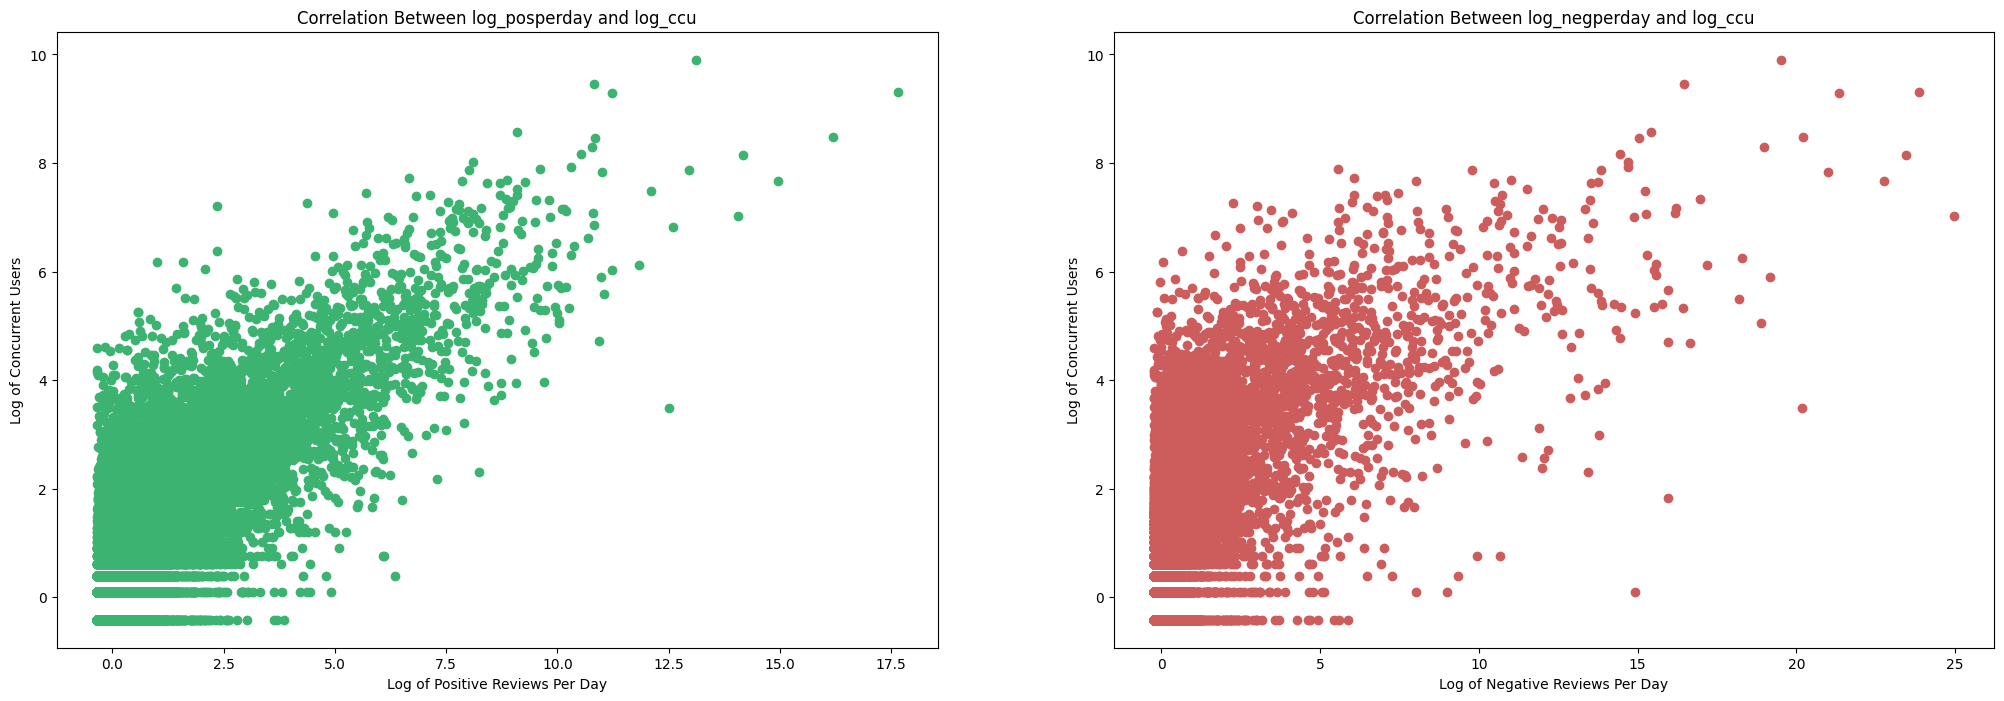

In [ ]:
fig, ax = plt.subplots(1, 2, figsize =(25, 8))

ax[0].scatter(success_df_final['log_PosPerDay'], success_df_final['log_ccu'], color = 'mediumseagreen')
ax[0].set_xlabel('Log of Positive Reviews Per Day')
ax[0].set_ylabel('Log of Concurrent Users')
ax[0].set_title('Correlation Between log_posperday and log_ccu')

ax[1].scatter(success_df_final['log_NegPerDay'], success_df_final['log_ccu'], color = 'indianred')
ax[1].set_xlabel('Log of Negative Reviews Per Day')
ax[1].set_ylabel('Log of Concurrent Users')
ax[1].set_title('Correlation Between log_negperday and log_ccu')

In [ ]:
# Weights for indie and non-indie games, refocused after removing ccu
indie_weights = {
    'current_engagement': 0.15,  # Focuses on player recommendations
    'overall_feedback': 0.075,    # Measures the game's total review sentiment
    'current_feedback': 0.075,    # Measures current player sentiment
    'current_commercial': 0.20,  # Focuses on recent sales/ownership growth
    'overall_commercial': 0.50   # Emphasizes total lifetime sales as a key success metric
}
non_indie_weights = {
    'current_engagement': 0.15,  # Focuses on player recommendations
    'overall_feedback': 0.075,    # Measures the game's total review sentiment
    'current_feedback': 0.075,    # Measures current player sentiment
    'current_commercial': 0.20,  # Focuses on recent sales/ownership growth
    'overall_commercial': 0.50   # Emphasizes total lifetime sales as a key success metric
}


def sanity_check(weights):
    # Extract individual weights for engagement, feedback, and commercial success
    current_engagement = weights['current_engagement']
    current_feedback = weights['current_feedback']
    overall_feedback = weights['overall_feedback']
    current_commercial = weights['current_commercial']
    overall_commercial = weights['overall_commercial']

    # Calculate total weights for each main category
    total_engagement = current_engagement
    total_feedback = current_feedback + overall_feedback
    total_commercial = current_commercial + overall_commercial

    # Calculate the sum of all weights
    total_weight = total_engagement + total_feedback + total_commercial

    # Calculate percentage contributions
    total_engagement_pct = (total_engagement / total_weight) * 100
    total_feedback_pct = (total_feedback / total_weight) * 100
    total_commercial_pct = (total_commercial / total_weight) * 100

    # Breakdown percentages for detailed view
    current_engagement_pct = (current_engagement / total_weight) * 100
    current_feedback_pct = (current_feedback / total_weight) * 100
    overall_feedback_pct = (overall_feedback / total_weight) * 100
    current_commercial_pct = (current_commercial / total_weight) * 100
    overall_commercial_pct = (overall_commercial / total_weight) * 100

    # Output results, formatted to clearly match the success formula components
    print(f"Success Metric Breakdown:")
    print(f"  Total Engagement: {total_engagement_pct:.2f}% (Recommendations/Day: {current_engagement_pct:.2f}%)")
    print(f"  Total Feedback: {total_feedback_pct:.2f}% (Current Positive Reviews/Day: {current_feedback_pct:.2f}%, Overall Review Sentiment: {overall_feedback_pct:.2f}%)")
    print(f"  Total Commercial Success: {total_commercial_pct:.2f}% (Current Sales/Owners/Day: {current_commercial_pct:.2f}%, Total Lifetime Sales: {overall_commercial_pct:.2f}%)")



print("Indie Game Weights:")
sanity_check(indie_weights)

print("\nNon-Indie Game Weights:")
sanity_check(non_indie_weights)


Indie Game Weights:
Success Metric Breakdown:
  Total Engagement: 15.00% (Recommendations/Day: 15.00%)
  Total Feedback: 15.00% (Current Positive Reviews/Day: 7.50%, Overall Review Sentiment: 7.50%)
  Total Commercial Success: 70.00% (Current Sales/Owners/Day: 20.00%, Total Lifetime Sales: 50.00%)

Non-Indie Game Weights:
Success Metric Breakdown:
  Total Engagement: 15.00% (Recommendations/Day: 15.00%)
  Total Feedback: 15.00% (Current Positive Reviews/Day: 7.50%, Overall Review Sentiment: 7.50%)
  Total Commercial Success: 70.00% (Current Sales/Owners/Day: 20.00%, Total Lifetime Sales: 50.00%)


In [ ]:
def success(df, start, end, indie_weights, non_indie_weights):
    success = []
    df = df.fillna(0)  # Set all NaN values to zero

    for i in range(start, end):
        # Determine if the game is indie based on 'genre' or 'tags'
        if "Indie" in str(df.iloc[i]['genre']) or "Indie" in str(df.iloc[i]['tags']):
            weights = indie_weights
        else:
            weights = non_indie_weights

        # Calculate feedback score using the log-transformed columns
        total_reviews = df.iloc[i]['log_PosPerDay'] + df.iloc[i]['log_NegPerDay']
        feedback_score = (
            0 if total_reviews == 0 else
            max(0, (df.iloc[i]['log_PosPerDay'] - 1 / (total_reviews + 1)) +
                (1 - (df.iloc[i]['log_NegPerDay'] - 1 / (total_reviews + 1))))
        )

        # Calculate success metric
        metric = (
            weights['current_engagement'] * df.iloc[i]['log_RecsPerDay'] +  # Current engagement
            weights['current_feedback'] * df.iloc[i]['log_PosPerDay'] +     # Current positive reviews/day
            weights['overall_feedback'] * feedback_score +                  # Overall review sentiment
            weights['current_commercial'] * df.iloc[i]['log_MaxOwnersPerDay'] +  # Current sales/owners/day
            weights['overall_commercial'] * df.iloc[i]['log_MaxOwnersPerDay']    # Total lifetime sales
        )

        success.append(metric)

    return success

In [ ]:
#df_sample = success_df_final.sample(1000, random_state=0)
#success_scores = success(df_sample, 0, len(df_sample), indie_weights, non_indie_weights)

success_scores = success(success_df_final, 0, len(success_df_final), indie_weights, non_indie_weights)
#joining success_scores with success_df_final

#df_sample['success'] = success_scores
success_df_final['success'] = success_scores
success_df_final.sample(10)

NameError: name 'success' is not defined

In [ ]:
success_df_final.sample(10)

,appid,name,genre,tags,positive,negative,recommendations,days_released,max_owners,log_MaxOwnersPerDay,log_initialprice,log_median_2weeks,log_median_forever,log_ccu,log_PosPerDay,log_NegPerDay,log_RecsPerDay,success
52917,2234100.0,Deadly Platform,"Action, Adventure, Casual, Indie, Early Access","{'Action': 190, 'Casual': 186, 'Adventure': 18...",-0.046754,-0.040476,-0.052897,-0.881927,-0.066787,-0.198081,0.044487,-0.093007,-0.392624,-0.416928,-0.333356,-0.240782,-0.286651,-0.138599
59509,2628950.0,Paramorfosi,"Action, Adventure, Casual, Indie","{'Action': 106, 'Casual': 100, 'Horror': 97, '...",-0.046727,-0.040330,-0.052897,-1.159839,-0.066787,0.291134,-1.734361,-0.093007,-0.392624,-0.416928,-0.314525,-0.228708,-0.286651,0.205770
31039,1073490.0,Monster X Monster,"Adventure, Indie, RPG, Strategy, Early Access","{'Roguelike Deckbuilder': 55, 'Card Battler': ...",-0.046699,-0.040185,-0.052897,0.217165,-0.066787,-0.886206,-0.645967,-0.093007,-0.392624,-0.416928,-0.339274,-0.237085,-0.286651,-0.621451
19751,757040.0,Desert Golfing,"Indie, Sports","{'Sports': 23, 'Indie': 21, 'Golf': 6, 'Minima...",-0.046003,-0.035102,-0.052897,0.656634,-0.034129,0.414116,-0.645967,-0.093007,-0.392624,-0.416928,-0.322176,-0.187310,-0.286651,0.287605
80,2820.0,X3: Terran Conflict,"Action, Simulation, Strategy","{'Space': 350, 'Simulation': 250, 'Sandbox': 1...",0.017901,0.016743,0.026690,3.469238,0.292452,1.383829,1.080473,-0.093007,2.137584,2.829892,0.266332,-0.005769,0.263219,1.123545
59880,2656740.0,Endless Furry TD - Tower Defense,"Action, Casual, Strategy","{'Strategy': 189, 'Action': 180, 'Tower Defens...",-0.043833,-0.036990,-0.047994,-1.165699,-0.066787,0.306907,-0.645967,-0.093007,-0.392624,-0.416928,0.235331,0.044819,0.373481,0.377795
11708,535270.0,Constricting Cubes,"Action, Casual, Indie, Strategy","{'Strategy': 37, 'Action': 36, 'Indie': 36, 'C...",-0.046365,-0.039169,-0.052897,1.025789,-0.066787,-1.108097,0.330777,-0.093007,2.497267,0.092374,-0.333662,-0.229682,-0.286651,-0.776488
12461,555580.0,The Legend of Dark Witch 2 （魔神少女エピソード２）,"Action, Adventure, Casual, Indie","{'Action': 38, 'Indie': 38, 'Adventure': 35, '...",0.394315,0.275241,0.477224,0.546976,0.655320,2.474739,1.955644,-0.093007,2.786938,4.228687,3.387647,2.122186,3.285728,2.649160
48411,1998340.0,Labyrinth of Galleria: The Moon Society,"RPG, Strategy","{'RPG': 508, 'Strategy': 487, 'Dungeon Crawler...",-0.046699,-0.040330,-0.052897,-0.709488,-0.066787,-0.377865,-0.137021,-0.093007,-0.392624,-0.416928,-0.331864,-0.236483,-0.286651,-0.264546
6323,377190.0,Pale Echoes,"Indie, RPG","{'Indie': 32, 'RPG': 31, 'RPGMaker': 11}",-0.046226,-0.037571,-0.052897,1.390757,-0.066787,-1.180582,-0.645967,-0.093007,-0.392624,-0.416928,-0.332419,-0.219363,-0.286651,-0.827816


In [ ]:
def identify_successful_games(df, indie_required_top_count=2, non_indie_required_top_count=3, indie_top_pct=0.50, non_indie_top_pct=0.75):
    # Calculate feedback ratio
    df['feedback_ratio'] = df['positive'] / (df['positive'] + df['negative'])
    avg_feedback_ratio = df['feedback_ratio'].mean()

    # Determine indie status for each game
    is_indie = df['genre'].str.contains('Indie') | df['tags'].str.contains('Indie')

    # Calculate thresholds for indie and non-indie games
    indie_thresholds = {
        'max_owners': df[is_indie]['max_owners'].quantile(indie_top_pct),
        'log_RecsPerDay': df[is_indie]['log_RecsPerDay'].quantile(indie_top_pct),
        'log_MaxOwnersPerDay': df[is_indie]['log_MaxOwnersPerDay'].quantile(indie_top_pct),
        'log_PosPerDay': df[is_indie]['log_PosPerDay'].quantile(indie_top_pct)
    }
    non_indie_thresholds = {
        'max_owners': df[~is_indie]['max_owners'].quantile(non_indie_top_pct),
        'log_RecsPerDay': df[~is_indie]['log_RecsPerDay'].quantile(non_indie_top_pct),
        'log_MaxOwnersPerDay': df[~is_indie]['log_MaxOwnersPerDay'].quantile(non_indie_top_pct),
        'log_PosPerDay': df[~is_indie]['log_PosPerDay'].quantile(non_indie_top_pct)
    }

    # Create conditions using vectorized operations
    df['meets_max_owners'] = np.where(
        is_indie,
        df['max_owners'] >= indie_thresholds['max_owners'],
        df['max_owners'] >= non_indie_thresholds['max_owners']
    ).astype(int)
    df['meets_recs_per_day'] = np.where(
        is_indie,
        df['log_RecsPerDay'] >= indie_thresholds['log_RecsPerDay'],
        df['log_RecsPerDay'] >= non_indie_thresholds['log_RecsPerDay']
    ).astype(int)
    df['meets_owners_growth'] = np.where(
        is_indie,
        df['log_MaxOwnersPerDay'] >= indie_thresholds['log_MaxOwnersPerDay'],
        df['log_MaxOwnersPerDay'] >= non_indie_thresholds['log_MaxOwnersPerDay']
    ).astype(int)
    df['meets_pos_per_day'] = np.where(
        is_indie,
        df['log_PosPerDay'] >= indie_thresholds['log_PosPerDay'],
        df['log_PosPerDay'] >= non_indie_thresholds['log_PosPerDay']
    ).astype(int)
    df['meets_feedback'] = (df['feedback_ratio'] > avg_feedback_ratio).astype(int)

    # Count the number of conditions each game meets
    condition_columns = ['meets_max_owners', 'meets_recs_per_day', 'meets_owners_growth', 'meets_pos_per_day', 'meets_feedback']
    df['conditions_met_count'] = df[condition_columns].sum(axis=1)

    # Reminder of how many columns are considered
    num_columns = len(condition_columns)
    print(f"Number of columns being considered for success: {num_columns}")

    # Determine success based on the required number of conditions for indie and non-indie games
    df['success'] = np.where(
        (is_indie & (df['conditions_met_count'] >= indie_required_top_count)) |
        (~is_indie & (df['conditions_met_count'] >= non_indie_required_top_count)),
        1, 0
    )

    return df

# Apply the function to the DataFrame
success_df_final = identify_successful_games(success_df_final, indie_required_top_count=3, non_indie_required_top_count=3, indie_top_pct=0.85, non_indie_top_pct=0.85)

# Show the distribution of identified successful games
success_count = success_df_final['success'].sum()
total_games = len(success_df_final)
indie_success_count = success_df_final[(success_df_final['success'] == 1) & (success_df_final['genre'].str.contains('Indie'))].shape[0]
non_indie_success_count = success_count - indie_success_count

print(f"Total games: {total_games}, Successful games: {success_count}")
print(f"Indie games marked successful: {indie_success_count}")
print(f"Non-indie games marked successful: {non_indie_success_count}")

Number of columns being considered for success: 5
Total games: 64675, Successful games: 7352
Indie games marked successful: 4993
Non-indie games marked successful: 2359


In [ ]:
def identify_successful_games(df, required_top_count=3, top_pct=0.75):
    # Calculate feedback ratio
    df['feedback_ratio'] = df['positive'] / (df['positive'] + df['negative'])
    avg_feedback_ratio = df['feedback_ratio'].mean()

    # Determine indie status for each game
    is_indie = df['genre'].str.contains('Indie') | df['tags'].str.contains('Indie')

    # Calculate thresholds for indie games
    indie_thresholds = {
        'max_owners': df[is_indie]['max_owners'].quantile(top_pct),
        'log_RecsPerDay': df[is_indie]['log_RecsPerDay'].quantile(top_pct),
        'log_MaxOwnersPerDay': df[is_indie]['log_MaxOwnersPerDay'].quantile(top_pct),
        'log_PosPerDay': df[is_indie]['log_PosPerDay'].quantile(top_pct)
    }

    # Calculate thresholds for non-indie games
    non_indie_thresholds = {
        'max_owners': df[~is_indie]['max_owners'].quantile(top_pct),
        'log_RecsPerDay': df[~is_indie]['log_RecsPerDay'].quantile(top_pct),
        'log_MaxOwnersPerDay': df[~is_indie]['log_MaxOwnersPerDay'].quantile(top_pct),
        'log_PosPerDay': df[~is_indie]['log_PosPerDay'].quantile(top_pct)
    }

    # Create conditions using vectorized operations
    df['meets_max_owners'] = np.where(
        is_indie,
        df['max_owners'] >= indie_thresholds['max_owners'],
        df['max_owners'] >= non_indie_thresholds['max_owners']
    ).astype(int)
    df['meets_recs_per_day'] = np.where(
        is_indie,
        df['log_RecsPerDay'] >= indie_thresholds['log_RecsPerDay'],
        df['log_RecsPerDay'] >= non_indie_thresholds['log_RecsPerDay']
    ).astype(int)
    df['meets_owners_growth'] = np.where(
        is_indie,
        df['log_MaxOwnersPerDay'] >= indie_thresholds['log_MaxOwnersPerDay'],
        df['log_MaxOwnersPerDay'] >= non_indie_thresholds['log_MaxOwnersPerDay']
    ).astype(int)
    df['meets_pos_per_day'] = np.where(
        is_indie,
        df['log_PosPerDay'] >= indie_thresholds['log_PosPerDay'],
        df['log_PosPerDay'] >= non_indie_thresholds['log_PosPerDay']
    ).astype(int)
    df['meets_feedback'] = (df['feedback_ratio'] > avg_feedback_ratio).astype(int)

    # Count the number of conditions each game meets
    condition_columns = ['meets_max_owners', 'meets_recs_per_day', 'meets_owners_growth', 'meets_pos_per_day', 'meets_feedback']
    df['conditions_met_count'] = df[condition_columns].sum(axis=1)

    # Reminder of how many columns are considered
    num_columns = len(condition_columns)
    print(f"Number of columns being considered for success: {num_columns}")

    # Determine success based on the number of conditions met
    df['success'] = np.where(df['conditions_met_count'] >= required_top_count, 1, 0)

    # Return the updated DataFrame with the 'success' column
    return df

# Apply the function to the DataFrame
success_df_final = identify_successful_games(success_df_final, required_top_count=3, top_pct=0.85)

# Show the distribution of identified successful games
success_count = success_df_final['success'].sum()
total_games = len(success_df_final)
indie_success_count = success_df_final[(success_df_final['success'] == 1) & (success_df_final['genre'].str.contains('Indie'))].shape[0]
non_indie_success_count = success_count - indie_success_count

print(f"Total games: {total_games}, Successful games: {success_count}")
print(f"Indie games marked successful: {indie_success_count}")
print(f"Non-indie games marked successful: {non_indie_success_count}")

Number of columns being considered for success: 5
Total games: 64675, Successful games: 7352
Indie games marked successful: 4993
Non-indie games marked successful: 2359


In [ ]:
success_df_final.shape


(64675, 25)

In [ ]:
success_df_final['success'][0]

1

In [ ]:
success_df_final.appid.isna().sum()

306

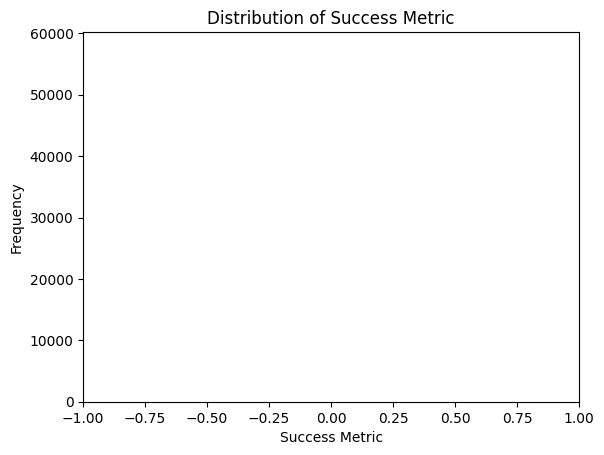

0.25    0.0
0.50    0.0
0.75    0.0
Name: success, dtype: float64


In [ ]:
from matplotlib import pyplot as plt

# histogram of success
plt.hist(success_df_final['success'], bins=1000)
# axis from -1 to 1:
plt.xlim(-1, 1)
plt.xlabel('Success Metric')
plt.ylabel('Frequency')
plt.title('Distribution of Success Metric')
plt.show()

# quantiles of success:
print(success_df_final['success'].quantile([0.25, 0.5, 0.75]))

0.25    0.0
0.50    0.0
0.75    0.0
Name: success, dtype: float64


Text(0.5, 1.0, 'Distribution of Success Metric')

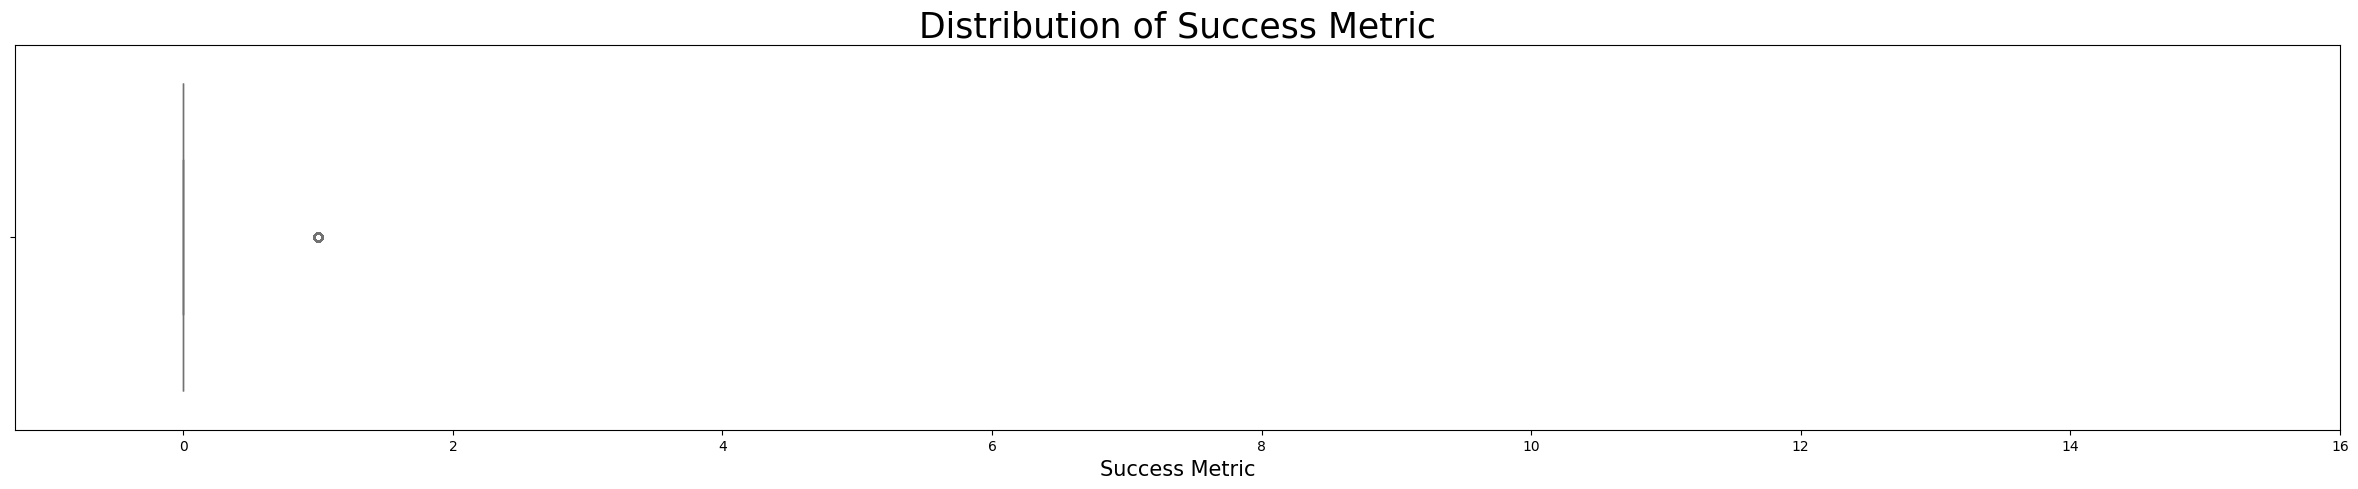

In [ ]:
fig, ax1 = plt.subplots(figsize = (30, 5))

sns.boxplot(success_df_final['success'], orient = 'h', color = 'khaki')

print(success_df_final['success'].quantile([0.25, 0.5, 0.75]))

plt.xlabel('Success Metric', fontsize = 15)
plt.xlim(-1.25, 16)
plt.title('Distribution of Success Metric', fontsize = 25)

In [ ]:
print('DataFrame Shape: {}'.format(success_df_final.shape))
print('DataFrame Info:')
print(success_df_final.info())

DataFrame Shape: (64675, 25)
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 64675 entries, 0 to 51432
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   appid                 64369 non-null  float64
 1   name                  64359 non-null  object 
 2   genre                 64157 non-null  object 
 3   tags                  64369 non-null  object 
 4   positive              64369 non-null  float64
 5   negative              64369 non-null  float64
 6   recommendations       64369 non-null  float64
 7   days_released         64369 non-null  float64
 8   max_owners            64369 non-null  float64
 9   log_MaxOwnersPerDay   64369 non-null  float64
 10  log_initialprice      64369 non-null  float64
 11  log_median_2weeks     64369 non-null  float64
 12  log_median_forever    64369 non-null  float64
 13  log_ccu               64369 non-null  float64
 14  log_PosPerDay         64369 no

Unsure which graph we want to go with so I'm leaving both in and we can decide which we like better!

In [ ]:
# on appid joining success and success_binary to reg_df:
df_full = reg_df.merge(success_df_final[['appid', 'success']], on='appid', how='left') # Merging with reg_df

In [ ]:
print(df_full.shape)
df_full.sample(10)

(64425, 18)


,appid,name,genre,tags,initialprice,median_2weeks,median_forever,ccu,positive,negative,recommendations,days_released,max_owners,PosPerDay,NegPerDay,RecsPerDay,MaxOwnersPerDay,success
17362,696990,Fear For Freedom,"Adventure, Casual, Free To Play, Indie","{'Free to Play': 30, 'Indie': 25, 'Adventure':...",0.00,0,1,0,82,84,0,2587.0,50000,0.031697,0.032470,0.000000,19.327406,0
57071,2479000,Noise-o-matic,"Audio Production, Utilities","{'Utilities': 53, 'Audio Production': 52, 'Mus...",7.99,0,0,19,58,13,0,249.0,10000,0.232932,0.052209,0.000000,40.160643,0
10025,493310,Requiem: Avenging Angel,Action,"{'Action': 59, 'FPS': 20, 'First-Person': 17, ...",9.99,0,18,2,79,16,0,3007.0,500000,0.026272,0.005321,0.000000,166.278683,0
64124,3095260,Dark Ascent,"Adventure, Casual, Indie, Strategy","{'Precision Platformer': 274, 'Exploration': 2...",2.99,0,0,0,3,0,0,67.0,10000,0.044776,0.000000,0.000000,149.253731,0
17648,704670,Inexplicable Geeks: Dawn of Just Us,"Adventure, Indie","{'Time Management': 123, 'Visual Novel': 117, ...",9.99,0,0,0,2,2,0,2342.0,50000,0.000854,0.000854,0.000000,21.349274,0
8725,448910,Axes and Acres,"Indie, Strategy","{'Indie': 30, 'Strategy': 29, 'Turn-Based': 21...",9.99,0,0,1,117,27,103,3098.0,50000,0.037766,0.008715,0.033247,16.139445,0
2832,274500,Brigador: Up-Armored Edition,"Action, Indie","{'Twin Stick Shooter': 217, 'Action': 212, 'To...",24.99,0,86,15,4960,326,4121,3042.0,500000,1.630506,0.107166,1.354701,164.365549,0
55699,2398000,Mega Maze,"Casual, Indie","{'Casual': 55, 'Procedural Generation': 47, 'D...",1.99,0,0,0,1,0,0,488.0,10000,0.002049,0.000000,0.000000,20.491803,0
42538,1753130,Balls Mania!,"Action, Casual, Indie","{'Action': 92, 'Arcade': 86, 'Bullet Hell': 83...",0.99,0,0,0,2,0,0,472.0,50000,0.004237,0.000000,0.000000,105.932203,0
917,41060,Serious Sam Classic: The Second Encounter,"Action, Indie","{'Action': 130, 'FPS': 112, 'Classic': 85, 'Go...",5.99,0,25,23,1679,68,1498,1858.0,1000000,0.903660,0.036598,0.806243,538.213132,0


In [ ]:
df_cleaned['genre'] = df_cleaned['genre'].fillna('none')

df_cleaned['genre'].isna().sum()

genre = df_cleaned['genre']

genre = genre.to_list()

type(genre)


list

In [ ]:
df_cleaned['tags'].fillna('none')

df_cleaned['tags'].isna().sum()

df_cleaned['tags_cleaned'] = df_cleaned['tags'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) and isinstance(x, str) else x)

df_cleaned['tags_cleaned'] = df_cleaned['tags_cleaned'].apply(lambda x: list(x.keys()) if isinstance(x, dict) else x)

In [ ]:
tags = df_full['tags']
# converting from string to dict:
tags = tags.apply(lambda x: ast.literal_eval(x))
#converting from dict to dict keys:
tag_keys = tags.apply(lambda x: x if isinstance(x, dict) else {}).apply(lambda x: list(x.keys()))
tag_keys

,tags
0,"[Action, FPS, Multiplayer, Shooter, Classic, T..."
1,"[Action, FPS, Multiplayer, Classic, Hero Shoot..."
2,"[FPS, World War II, Multiplayer, Shooter, Acti..."
3,"[Action, FPS, Classic, Multiplayer, Shooter, F..."
4,"[FPS, Action, Classic, Sci-fi, Singleplayer, S..."
...,...
64420,"[Arcade, Atmospheric, Surreal, Retro, Psychede..."
64421,"[Adventure, Simulation, Action, Puzzle, Walkin..."
64422,"[Choose Your Own Adventure, 3D Platformer, Hid..."
64423,"[Adventure, Casual, Sports, Conversation, Sing..."


In [ ]:
for i in tag_keys:
  genre.append(i)

len(genre)

128794

In [ ]:
for i in genre:
  types = []
  types.append(type(i))

  unique = []
  if type(i) not in unique:
    unique.append(type(i))

unique

[list]

In [ ]:
print(genre[78092:79002])

[['Horror', 'Psychological Horror', 'Survival Horror', 'Dark', 'Multiplayer', 'First-Person', 'Singleplayer', 'Atmospheric', 'Adventure', 'Indie', 'Violent', 'Exploration', 'Realistic', 'Walking Simulator', 'Surreal', 'Story Rich', 'Simulation', 'Early Access', 'Experimental', 'Co-op'], ['Simulation', 'Indie', 'Casual', 'Adventure', 'Dating Sim', 'Psychological Horror', 'Memes', 'Visual Novel', 'Anime', 'Nudity', 'LGBTQ+'], ['Early Access', 'Indie', 'Casual', 'Simulation', 'VR'], ['Casual', 'Action', 'Indie', 'Sports', 'VR', 'Fishing'], ['Comedy', 'Romance', 'Point & Click', 'Dragons', 'Emotional', 'Story Rich', 'Adventure', 'Puzzle', 'Drama', 'Walking Simulator', 'Cinematic', 'Funny', 'Third Person', 'Conversation', 'Interactive Fiction', 'Anime', 'Fantasy', 'Singleplayer', 'Cute', '3D'], ['Action', 'Adventure', 'Casual', 'VR', 'Western'], ['Action', 'Simulation', 'Strategy', 'Violent', 'Gore', 'Cold War', 'FPS'], ['Strategy', 'Fantasy', 'Turn-Based Strategy', 'RTS', 'Grand Strategy',

In [ ]:
from gensim.models import Word2Vec
import gensim
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk
nltk.download('punkt')
import warnings

model1 = Word2Vec(sentences = genre, min_count = 1)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
word_vectors = [model1.wv[tag] for tag in model1.wv.index_to_key]

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage

linked = linkage(word_vectors, method = 'ward')

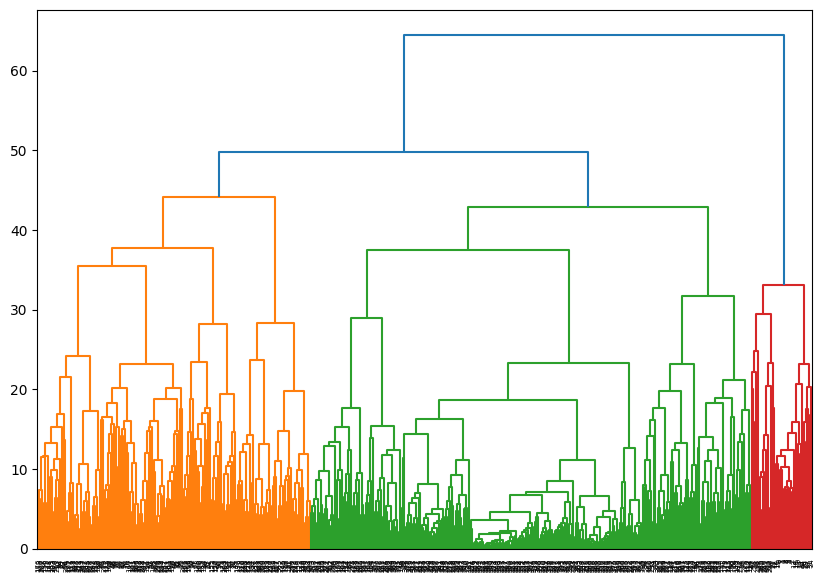

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

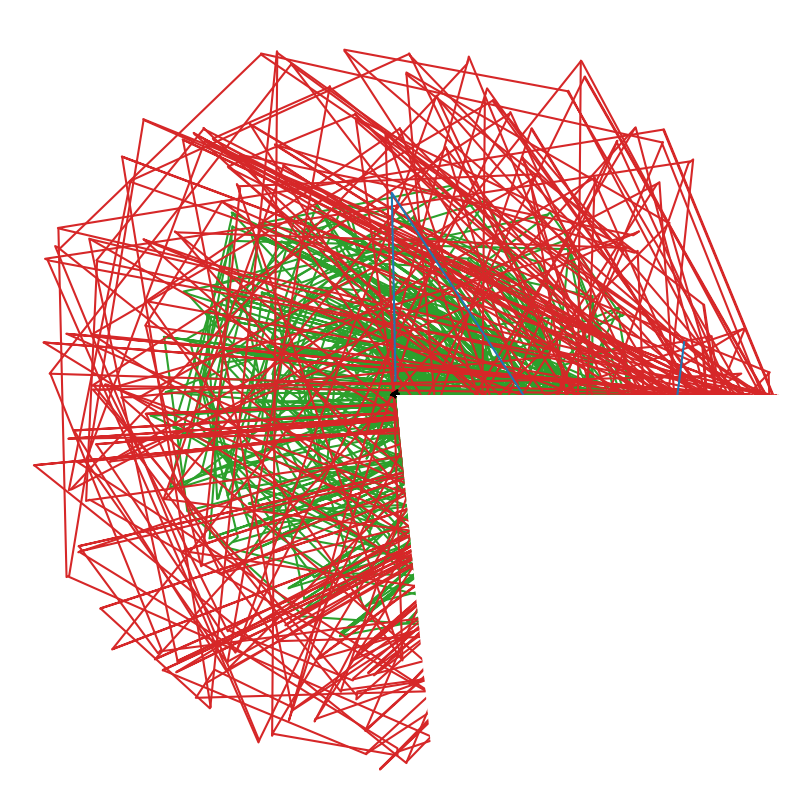

In [ ]:
from scipy.cluster.hierarchy import dendrogram
import numpy as np

# Create a figure for the circular dendrogram
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'polar': True})

# Generate the dendrogram data
dendro = dendrogram(linked, orientation='right', no_labels=True)

# Convert the coordinates to polar
icoord = np.array(dendro['icoord'])
dcoord = np.array(dendro['dcoord'])

for xs, ys in zip(icoord, dcoord):
    # Map Cartesian coordinates to polar
    ax.plot(np.deg2rad(xs), ys, color='black')

# Hide the polar frame and ticks for better readability
ax.set_frame_on(False)
ax.set_xticks([])
ax.set_yticks([])

plt.show()

Random Forest Model

*This can't be run until the success metric is figured out properly.*
*I figured that classifier would be the best bet for this since we're figuring out a binary target variable (success or not), if this changes that's perfectly fine!*

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfmod = RandomForestClassifier(n_estimators = 100, random_state = 254)

In [ ]:
# TODO For Tomorrow:
# Set up label encoder
# Make a copy of the full dataframe
# Encode the data so it is numerical
# Drop the name column as it is not important in the tree
# Run model

In [ ]:
# Setting up a label encoder to make genres and tags numerical
# Using a label encoder and not a one hot encoder due to number of genres and not having a specific rank (one is higher than the other)

from sklearn import preprocessing

label = preprocessing.LabelEncoder()

rfdf = df_full.copy()

In [ ]:
rfdf = rfdf.drop(columns = ['name'])

rfdf.head()

,appid,genre,tags,initialprice,median_2weeks,median_forever,ccu,positive,negative,recommendations,days_released,max_owners,PosPerDay,NegPerDay,RecsPerDay,MaxOwnersPerDay,success
0,10,Action,"{'Action': 5477, 'FPS': 4902, 'Multiplayer': 3...",9.99,61,268,15312,234532,6175,152593,8734.0,20000000,26.852759,0.707007,17.471147,2289.901534,1
1,20,Action,"{'Action': 764, 'FPS': 327, 'Multiplayer': 277...",4.99,0,20,72,7283,1097,6250,9314.0,10000000,0.781941,0.117780,0.671033,1073.652566,1
2,30,Action,"{'FPS': 799, 'World War II': 270, 'Multiplayer...",4.99,211,19,95,6225,675,4134,7823.0,2000000,0.795731,0.086284,0.528442,255.656398,1
3,40,Action,"{'Action': 635, 'FPS': 151, 'Classic': 115, 'M...",4.99,31,16,2,2536,524,2212,8522.0,10000000,0.297583,0.061488,0.259563,1173.433466,1
4,50,Action,"{'FPS': 920, 'Action': 354, 'Classic': 286, 'S...",4.99,0,270,128,22069,1111,19968,9100.0,5000000,2.425165,0.122088,2.194286,549.450549,1


In [ ]:
rfdf['genre'] = rfdf['genre'].fillna('none')

rfdf['tags'] = rfdf['tags'].fillna('none')

rfdf_copy = rfdf.copy()

In [ ]:
short = []
movie = []
accounting = []
free = []
sexual = []
software = []
web = []
gore = []
audio = []
game = []
utilities = []
photo = []
education = []
design = []
early = []
none = []
sports = []
violent = []
nudity = []
massive = []
racing = []
simulation = []
casual = []
video = []
animation = []
rpg = []
indie = []
adventure = []
strat = []
action = []

def GenreEncoder(df, start, end, short, movie, accounting, free, sexual, software, web, gore, audio, game, utilities, photo,
                 eduction, design, early, none, sports, violent, nudity, massive, racing, simulation, casual, video, animation, rpg, indie,
                 adventure, strat, action):

  for i in range(start, end):

    if df.loc[i, 'genre'].find('Short') != -1:
      short.append(1)
    else:
      short.append(0)

    if df.loc[i, 'genre'].find('Movie') != -1:
      movie.append(1)
    else:
      movie.append(0)

    if df.loc[i, 'genre'].find('Accounting') != -1:
      accounting.append(1)
    else:
      accounting.append(0)

    if df.loc[i, 'genre'].find('Free') != -1:
      free.append(1)
    else:
      free.append(0)

    if df.loc[i, 'genre'].find('Sexual') != -1:
      sexual.append(1)
    else:
      sexual.append(0)

    if df.loc[i, 'genre'].find('Software') != -1:
      software.append(1)
    else:
      software.append(0)

    if df.loc[i, 'genre'].find('Web') != -1:
      web.append(1)
    else:
      web.append(0)

    if df.loc[i, 'genre'].find('Gore') != -1:
      gore.append(1)
    else:
      gore.append(0)

    if df.loc[i, 'genre'].find('Audio') != -1:
      audio.append(1)
    else:
      audio.append(0)

    if df.loc[i, 'genre'].find('Game') != -1:
      game.append(1)
    else:
      game.append(0)

    if df.loc[i, 'genre'].find('Utilities') != -1:
      utilities.append(1)
    else:
      utilities.append(0)

    if df.loc[i, 'genre'].find('Photo') != -1:
      photo.append(1)
    else:
      photo.append(0)

    if df.loc[i, 'genre'].find('Education') != -1:
      education.append(1)
    else:
      education.append(0)

    if df.loc[i, 'genre'].find('Design') != -1:
      design.append(1)
    else:
      design.append(0)

    if df.loc[i, 'genre'].find('Early') != -1:
      early.append(1)
    else:
      early.append(0)

    if df.loc[i, 'genre'].find('none') != -1:
      none.append(1)
    else:
      none.append(0)

    if df.loc[i, 'genre'].find('Sports') != -1:
      sports.append(1)
    else:
      sports.append(0)

    if df.loc[i, 'genre'].find('Violent') != -1:
      violent.append(1)
    else:
      violent.append(0)

    if df.loc[i, 'genre'].find('Nudity') != -1:
      nudity.append(1)
    else:
      nudity.append(0)

    if df.loc[i, 'genre'].find('Massively') != -1:
      massive.append(1)
    else:
      massive.append(0)

    if df.loc[i, 'genre'].find('Raciing') != -1:
      racing.append(1)
    else:
      racing.append(0)

    if df.loc[i, 'genre'].find('Simulation') != -1:
      simulation.append(1)
    else:
      simulation.append(0)

    if df.loc[i, 'genre'].find('Casual') != -1:
      casual.append(1)
    else:
      casual.append(0)

    if df.loc[i, 'genre'].find('Video') != -1:
      video.append(1)
    else:
      video.append(0)

    if df.loc[i, 'genre'].find('Animation') != -1:
      animation.append(1)
    else:
      animation.append(0)

    if df.loc[i, 'genre'].find('RPG') != -1:
      rpg.append(1)
    else:
      rpg.append(0)

    if df.loc[i, 'genre'].find('Indie') != -1:
      indie.append(1)
    else:
      indie.append(0)

    if df.loc[i, 'genre'].find('Adventure') != -1:
      adventure.append(1)
    else:
      adventure.append(0)

    if df.loc[i, 'genre'].find('Strategy') != -1:
      strat.append(1)
    else:
      strat.append(0)

    if df.loc[i, 'genre'].find('Action') != -1:
      action.append(1)
    else:
      action.append(0)

In [ ]:
GenreEncoder(rfdf,0, len(rfdf), short, movie, accounting, free, sexual, software, web, gore, audio, game, utilities, photo,
             education, design, early, none, sports, violent, nudity, massive, racing, simulation, casual, video, animation, rpg, indie,
             adventure, strat, action)

In [ ]:
rfdf = rfdf.drop(columns = 'appid')

In [ ]:
#dropping all columns used for success, columns 32 - 43:
rfdf = rfdf.drop(columns = ['median_2weeks', 'median_forever', 'ccu', 'positive', 'negative', 'recommendations', 'days_released', 'max_owners', 'PosPerDay', 'NegPerDay', 'RecsPerDay', 'MaxOwnersPerDay'])
print(rfdf.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64425 entries, 0 to 64424
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   genre         64425 non-null  object 
 1   tags          64425 non-null  object 
 2   initialprice  64425 non-null  float64
 3   success       64425 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 2.0+ MB
None


In [ ]:
clean_rfdf = rfdf.copy()

In [ ]:
rfdf

,tags,initialprice,Open World Survival Craft,Hex Grid,Linear,Class-Based,Pinball,War,Difficult,Mature,Spelling,Action RTS,City Builder,...,Psychological,Football (Soccer),Medieval,Hacking,Cartoony,Artificial Intelligence,Building,none,Funny,Wargame,Sequel,Game Development,success
0,"{'Action': 5477, 'FPS': 4902, 'Multiplayer': 3...",9.99,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1
1,"{'Action': 764, 'FPS': 327, 'Multiplayer': 277...",4.99,0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,1
2,"{'FPS': 799, 'World War II': 270, 'Multiplayer...",4.99,0,0,0,1,0,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1
3,"{'Action': 635, 'FPS': 151, 'Classic': 115, 'M...",4.99,0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
4,"{'FPS': 920, 'Action': 354, 'Classic': 286, 'S...",4.99,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64732,"{'Arcade': 238, 'Atmospheric': 232, 'Surreal':...",1.99,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
64733,"{'Adventure': 196, 'Simulation': 190, 'Action'...",0.99,0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,1
64734,"{'Choose Your Own Adventure': 51, '3D Platform...",4.99,0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0
64735,"{'Adventure': 60, 'Casual': 54, 'Sports': 51, ...",49.99,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
genres = genre_df.loc[:, 'genre']
tags = tag_df.loc[:, 'tag']

#genres = labeler.fit_transform(genres)
#tags = labeler.fit_transform(tags)

In [ ]:
len(genres)

30

In [ ]:
genres = genres.to_list()


In [ ]:
for i in tags:
  genres.append(i)

len(genres)

480

In [ ]:
tng = list(set(genres))

len(tng)

453

In [ ]:
# I'm going to try and attempt to create a column for each tag

idx = 3

for i in tng:
  rfdf.insert(idx, i, 0)
  idx = idx + 1

<ipython-input-50-b4f39b041e19>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rfdf.insert(idx, i, 0)
<ipython-input-50-b4f39b041e19>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rfdf.insert(idx, i, 0)
<ipython-input-50-b4f39b041e19>:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  rfdf.insert(

In [ ]:
idx = 0

for i in range(0, len(rfdf)):
  for j in tags:
    if rfdf.loc[i, 'tags'].find(j) != -1:
      rfdf.loc[i, j] = 1

  for k in genres:
    if rfdf.loc[i, 'genre'].find(k) != -1:
      rfdf.loc[i, k] = 1

In [ ]:
rfdf.shape

(64737, 456)

In [ ]:
rfdf = rfdf.drop(columns = 'genre')

In [ ]:
X = rfdf.iloc[:,0:457]
y = rfdf.loc[:, 'success']

X = X.drop(columns = ['tags','success'])

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 254)

In [ ]:
rfmod.fit(X_train, y_train)

y_preds = rfmod.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score

print('Accuracy Score for Training Data: {:.3f}'.format(rfmod.score(X_train, y_train)))
print('Accuracy Score for Test Data: {:.3f}'.format(accuracy_score(y_test, y_preds)))

Accuracy Score for Training Data: 0.998
Accuracy Score for Test Data: 0.875


In [ ]:
# Now we are gonna find the best metrics and range to use

params = {'max_depth':range(2,25)}

GSCV = GridSearchCV(RandomForestClassifier(random_state = 254), params, cv = 10)

GSCV.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=254),
             param_grid={'max_depth': range(2, 25)})

In [ ]:
# Will tell us what the best combination of criterion and depth are for the model

GSCV.best_estimator_

RandomForestClassifier(max_depth=24, random_state=254)

In [ ]:
best_rf = RandomForestClassifier(criterion = 'gini', max_depth = 24, random_state = 254)

In [ ]:
best_rf.fit(X_train, y_train)

y_preds = best_rf.predict(X_test)

print('Accuracy Score on Training Data: {:.3f}'.format(best_rf.score(X_train, y_train)))
print('Accuracy Score on Test Data: {:.3f}'.format(accuracy_score(y_test, y_preds)))

Accuracy Score on Training Data: 0.948
Accuracy Score on Test Data: 0.873


In [ ]:
tr_score = []
test_score = []
depth = []

for i in range(2, 25):
    rf_for = RandomForestClassifier(random_state = 254, criterion = 'gini', max_depth = i)
    rf_for.fit(X_train, y_train)

    y_pred = rf_for.predict(X_test)

    tr_score.append(rf_for.score(X_train, y_train))
    print('Training Accuracy for Depth {}: {:.3f}'.format(i, rf_for.score(X_train, y_train)))
    test_score.append(accuracy_score(y_test, y_pred))
    print('Test Accuracy for Depth {}: {:.3f}'.format(i, accuracy_score(y_test, y_pred)))
    depth.append(i)

Training Accuracy for Depth 2: 0.849
Test Accuracy for Depth 2: 0.844
Training Accuracy for Depth 3: 0.849
Test Accuracy for Depth 3: 0.844
Training Accuracy for Depth 4: 0.849
Test Accuracy for Depth 4: 0.844
Training Accuracy for Depth 5: 0.850
Test Accuracy for Depth 5: 0.845
Training Accuracy for Depth 6: 0.852
Test Accuracy for Depth 6: 0.848
Training Accuracy for Depth 7: 0.855
Test Accuracy for Depth 7: 0.850
Training Accuracy for Depth 8: 0.859
Test Accuracy for Depth 8: 0.853
Training Accuracy for Depth 9: 0.863
Test Accuracy for Depth 9: 0.855
Training Accuracy for Depth 10: 0.868
Test Accuracy for Depth 10: 0.858
Training Accuracy for Depth 11: 0.872
Test Accuracy for Depth 11: 0.859
Training Accuracy for Depth 12: 0.878
Test Accuracy for Depth 12: 0.863
Training Accuracy for Depth 13: 0.882
Test Accuracy for Depth 13: 0.864
Training Accuracy for Depth 14: 0.886
Test Accuracy for Depth 14: 0.865
Training Accuracy for Depth 15: 0.894
Test Accuracy for Depth 15: 0.866
Training

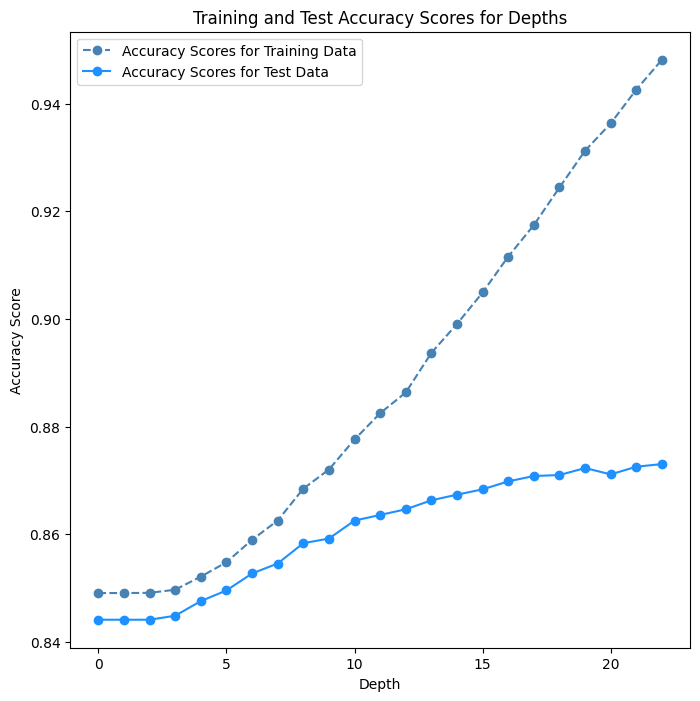

In [ ]:
fig, ax1 = plt.subplots(figsize = (8,8))

ax1.plot(tr_score, '--o', color = 'steelblue')
ax1.plot(test_score, '-o', color = 'dodgerblue')
ax1.set_title('Training and Test Accuracy Scores for Depths')
ax1.set_xlabel('Depth')
ax1.set_ylabel('Accuracy Score')
ax1.legend(['Accuracy Scores for Training Data', 'Accuracy Scores for Test Data'])

In [ ]:
importance = pd.DataFrame(best_rf.feature_importances_, index = X_train.columns, columns = ['Importance'])

In [ ]:
importance = importance.sort_values('Importance', ascending = False)

importance

,Importance
initialprice,0.080818
Multiplayer,0.031303
Co-op,0.020469
Great Soundtrack,0.017523
Soundtrack,0.016651
...,...
Accounting,0.000017
Elf,0.000014
8-bit Music,0.000003
Instrumental Music,0.000002


In [ ]:
importance_25 = importance.iloc[0:25, 0]

Text(0, 0.5, 'Importance')

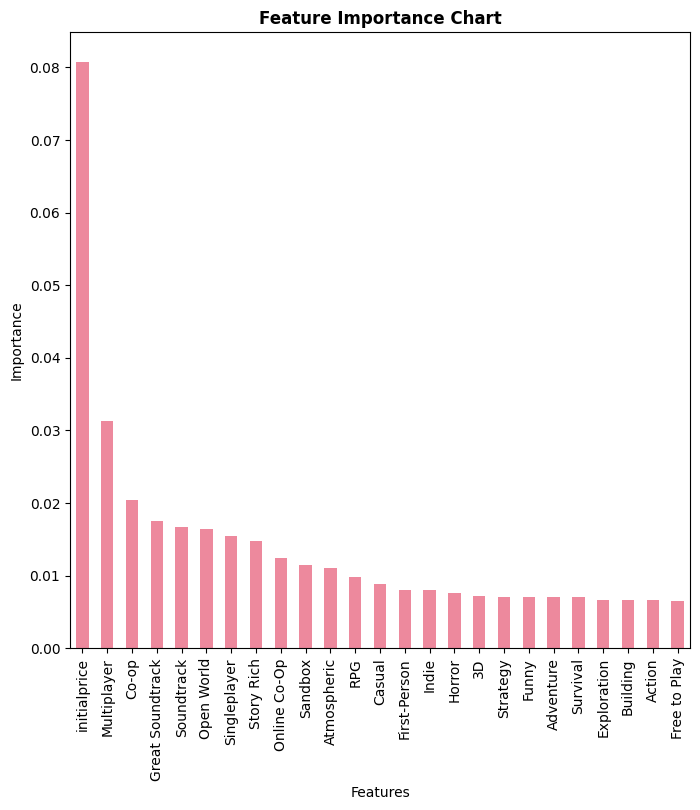

In [ ]:
fig, ax1 = plt.subplots(figsize = (8,8))

importance_25.plot.bar(ax = ax1, color = 'crimson', alpha = 0.5)
ax1.set_title('Feature Importance Chart', fontweight = 'bold')
ax1.set_xlabel('Features')
ax1.set_ylabel('Importance')

In [ ]:
# ROC Curve for random forest
# y_preds
from sklearn.metrics import roc_curve

brf_prob = best_rf.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, brf_prob[:,1], pos_label = 1)
auc = np.trapz(tpr, fpr)

In [ ]:
brf_prob.shape

(16185, 2)

Text(0.5, 1.0, 'AUC = 0.85998')

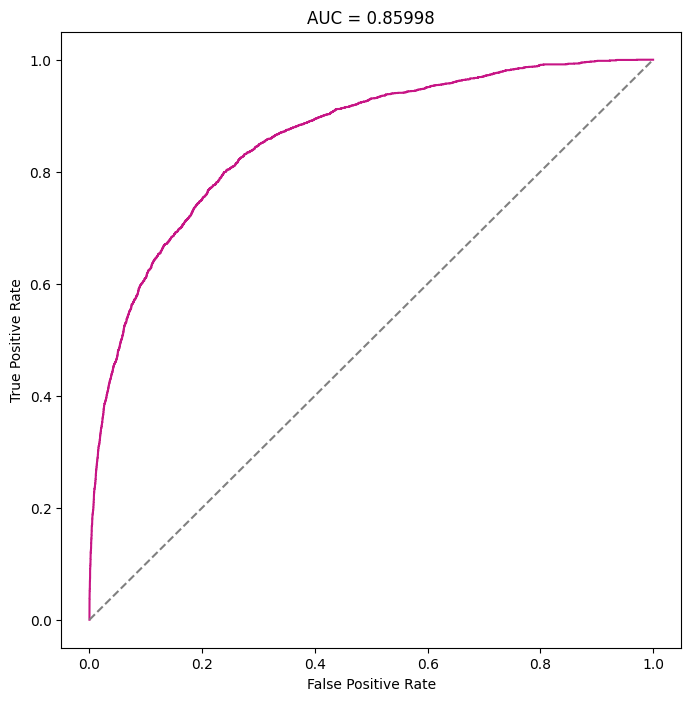

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 8))

ax1.step(fpr, tpr, color = 'mediumvioletred')
ax1.plot(fpr, fpr, '--' ,color = 'gray')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('AUC = {:.5f}'.format(auc))


Logistic Regression

In [ ]:
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter = 500, random_state = 254, solver = 'sag')

logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=500, random_state=254, solver='sag')

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve


y_preds = logreg.predict(X_test)

print('Accuracy Score on Training Data: {:.3f}'.format(logreg.score(X_train, y_train)))
print('Accuracy Score on Test Data: {:.3f}'.format(accuracy_score(y_test, y_preds)))

Accuracy Score on Training Data: 0.886
Accuracy Score on Test Data: 0.890


In [ ]:
rfdf.columns

Index(['tags', 'initialprice', 'Martial Arts', 'Casual', 'Simulation',
       'On-Rails Shooter', 'Pixel Graphics', 'Cyberpunk', 'Capitalism',
       'Time Travel',
       ...
       'Real-Time', 'Feature Film', 'Interactive Fiction', '3D Platformer',
       'Quick-Time Events', 'JRPG', 'FMV', 'Cartoon', 'World War I',
       'success'],
      dtype='object', length=456)

In [ ]:
importance = logreg.coef_[0]

imp = pd.DataFrame(importance, index = X.columns, columns = ['Coefficient'])

imp = imp.sort_values('Coefficient', ascending = False)

In [ ]:
imp_25 = imp.iloc[0:25, :]

Text(0, 0.5, 'Importance')

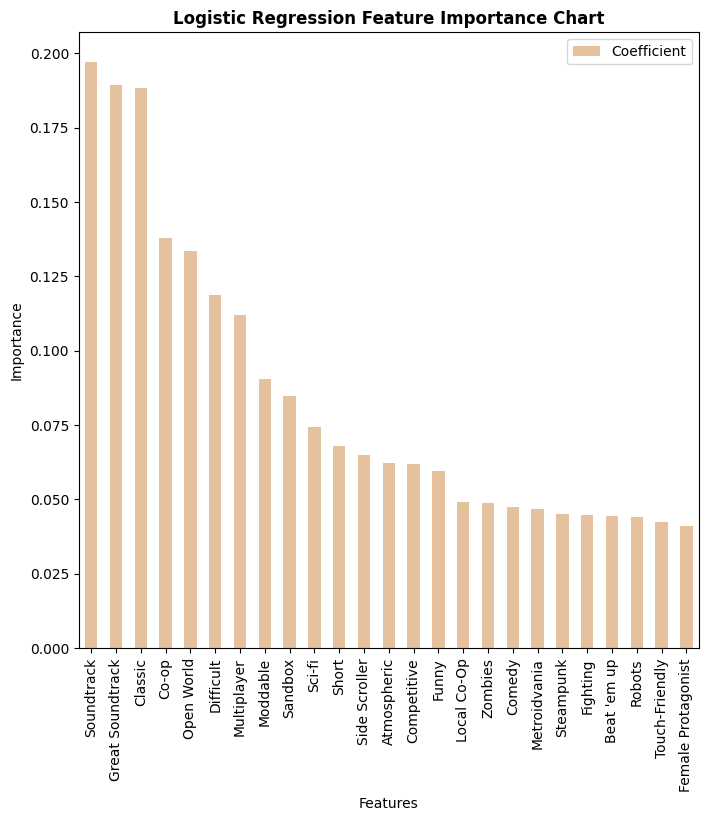

In [ ]:
fig, ax1 = plt.subplots(figsize = (8,8))

imp_25.plot.bar(ax = ax1, color = 'peru', alpha = 0.5)
ax1.set_title('Logistic Regression Feature Importance Chart', fontweight = 'bold')
ax1.set_xlabel('Features')
ax1.set_ylabel('Importance')

In [ ]:
lr_prob = logreg.predict_proba(X_test)

fpr, tpr, threshold = roc_curve(y_test, lr_prob[:,1], pos_label = 1)
auc = np.trapz(tpr, fpr)

Text(0.5, 1.0, 'AUC = 0.58366')

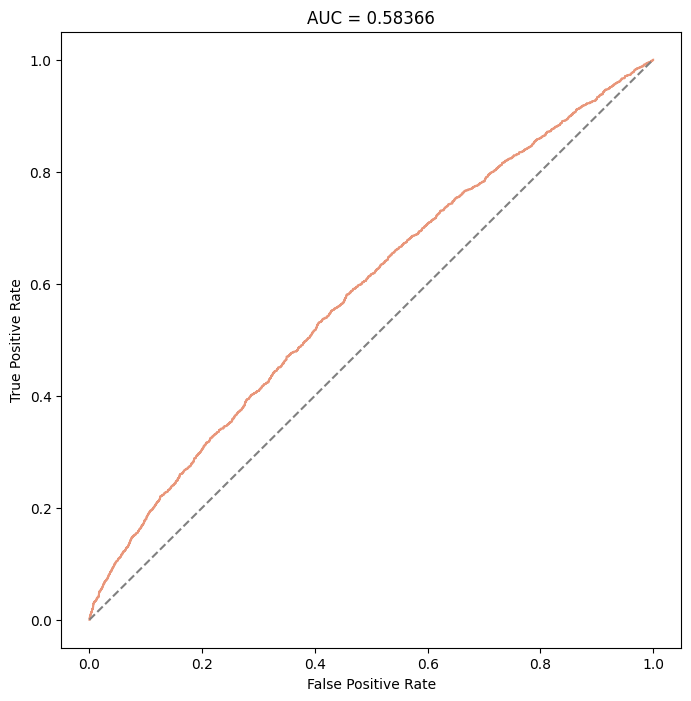

In [ ]:
fig, ax1 = plt.subplots(figsize = (8, 8))

ax1.step(fpr, tpr, color = 'darksalmon')
ax1.plot(fpr, fpr, '--' ,color = 'gray')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
ax1.set_title('AUC = {:.5f}'.format(auc))

Markov Clustering

In [ ]:
pip install markov_clustering[drawing]

In [ ]:
import markov_clustering as mc

In [ ]:
from sklearn.preprocessing import LabelEncoder

labeler = LabelEncoder()

In [ ]:
rfdf.shape

In [ ]:
from sklearn.cluster import KMeans

km_mod = KMeans(n_clusters = 200, random_state = 254, n_init = 20)
km = km_mod.fit(X)

In [ ]:
y = km_mod.fit_predict(X)

In [ ]:
y = pd.DataFrame(data = y, columns = ['Clusters'])

y.Clusters.unique()

In [ ]:
fig, ax1 = plt.subplots(figsize = (8,8))

ax1.scatter(X)

In [ ]:
import networkx as nx

genres = genres.reshape(5, 6)
tags = tags.reshape(450, 1)

result1 = mc.run_mcl(genres)

#result2 = mc.run_mcl(tags)
#clusters = mc.get_clusters(result)

#mc.draw_graph(A, clusters, node_size=50, with_labels=False, edge_color="silver")